<a href="https://colab.research.google.com/github/metorkhai/DATA-MINING/blob/main/Mining_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_excel("/content/sample_data/Online Retail.xlsx")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
print("K√≠ch th∆∞·ªõc ban ƒë·∫ßu:", df.shape)
print("\nTh√¥ng tin t·ªïng quan v·ªÅ c√°c c·ªôt:")
print(df.info())


K√≠ch th∆∞·ªõc ban ƒë·∫ßu: (541909, 8)

Th√¥ng tin t·ªïng quan v·ªÅ c√°c c·ªôt:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


#  L√†m s·∫°ch &amp; ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu



## 1. Chuy·ªÉn InvoiceData sang d·∫°ng datetime, t√°ch ra ng√†y/gi·ªù/th√°ng

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Month'] = df['InvoiceDate'].dt.month
display(df.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Day  Hour  Month  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    1     8     12  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8     12  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    1     8     12  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8     12  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8     12

## 2. X·ª≠ l√Ω Quantity √¢m (lo·∫°i ho·∫∑c ƒë√°nh d·∫•u l√† h·ªßy ƒë∆°n)

- Tr∆∞·ªõc h·∫øt ki·ªÉm tra xem c√≥ bao nhi√™u ph·∫ßn trƒÉm Quantity √¢m v√† InvoiceNo c√≥ 'c' ·ªü ƒë·∫ßu (nghƒ©a l√† ƒë∆°n b·ªã h·ªßy) ch·ªß y·∫øu l√† ƒë·ªÉ ph√¢n t√≠ch xem t·∫°i sao h·ªßy ƒë∆°n m√† n·∫øu kh√¥ng qu√° 5% th√¨ c√≥ th·∫ø x√≥a v√¨ qu√° √≠t ƒë·ªÉ ph√¢n t√≠ch

In [ ]:
# Check for negative quantities
negative_quantity_rows = df[df['Quantity'] < 0]
num_negative_quantity = negative_quantity_rows.shape[0]
percent_negative_quantity = (num_negative_quantity / df.shape[0]) * 100

print(f"S·ªë l∆∞·ª£ng gi√° tr·ªã √¢m ·ªü c·ªôt Quantity: {num_negative_quantity}")
print(f"Ph·∫ßn trƒÉm √¢m ·ªü c·ªôt  Quantity: {percent_negative_quantity:.2f}%")

S·ªë l∆∞·ª£ng gi√° tr·ªã √¢m ·ªü c·ªôt Quantity: 10624
Ph·∫ßn trƒÉm √¢m ·ªü c·ªôt  Quantity: 1.96%


In [ ]:
# Create a copy of the dataframe
df_copy = df.copy()
# Check for 'C' in InvoiceNo
invoice_with_c = df_copy[df_copy['InvoiceNo'].astype(str).str.contains('C', na=False)]
num_invoice_with_c = invoice_with_c.shape[0]
percent_invoice_with_c = (num_invoice_with_c / df_copy.shape[0]) * 100

print(f"S·ªë l∆∞·ª£ng ƒë∆°n c√≥ 'c' ·ªü ƒë·∫ßu trong c·ªôt InvoiceNo: {num_invoice_with_c}")
print(f"Ph·∫ßn trƒÉm ƒë∆°n c√≥ 'c' ·ªü ƒë·∫ßu trong c·ªôt InvoiceNo: {percent_invoice_with_c:.2f}%")


S·ªë l∆∞·ª£ng ƒë∆°n c√≥ 'c' ·ªü ƒë·∫ßu trong c·ªôt InvoiceNo: 9288
Ph·∫ßn trƒÉm ƒë∆°n c√≥ 'c' ·ªü ƒë·∫ßu trong c·ªôt InvoiceNo: 1.71%


In [ ]:
invoice_cancellation_rows = df_copy[df_copy['InvoiceNo'].astype(str).str.startswith('C', na=False)]
print("S·ªë l∆∞·ª£ng m√† ƒë∆°n h√†ng b·ªã h·ªßy (c√≥ 'c' ·ªü ƒë·∫ßu) th√¨ s·∫Ω c√≥ gi√° tr·ªã √¢m ·ªü quantity:",invoice_cancellation_rows.shape[0])
print()
print("Nh·ªØng d√≤ng m√† c√≥  'C':")
display(invoice_cancellation_rows)

S·ªë l∆∞·ª£ng m√† ƒë∆°n h√†ng b·ªã h·ªßy (c√≥ 'c' ·ªü ƒë·∫ßu) th√¨ s·∫Ω c√≥ gi√° tr·ªã √¢m ·ªü quantity: 9288

Nh·ªØng d√≤ng m√† c√≥  'C':


InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  Day  Hour  \
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom    1     9   
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom    1     9   
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom    1    10   
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom    1    10   
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom    1    10   
...                    ...        ...         ...             ...  ...   ...   
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom    9     9   
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom    9    10   
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom    9    11   
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom    9    11   
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom    9    11   

        Month  
141        12  
154        12  
235        12  
236        12  
237        12  
...       ...  
540449     12  
541541     12  
541715     12  
541716     12  
541717     12  

[9288 rows x 11 columns]

Sau khi ki·ªÉm tra xem th√¨ c√≥ 9288 d√≤ng l√† ƒë∆°n b·ªã h·ªßy chi·∫øm 1.71% v√† 10624 d√≤ng c√≥ gi√° tr·ªã √¢m 1.96% , v√† c√°c d√≤ng c√≥ ƒë∆°n h·ªßy v√† c√≥ Quantity √¢m l√† 9288. Th√¨ kh√¥ng qu√° nhi·ªÅu th√¨ ta x√≥a.

In [ ]:
df = df[df['Quantity'] > 0]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print( "Sau khi x√≥a c√°c d√≤ng d·ªØ li·ªáu h·ªßy ƒë∆°n v√† Quantity √¢m:", df.shape)


Sau khi x√≥a c√°c d√≤ng d·ªØ li·ªáu h·ªßy ƒë∆°n v√† Quantity √¢m: (531285, 11)


##3. X·ª≠ l√Ω d√≤ng thi·∫øu CustomerID, Description (b·ªï sung, b·ªè, ho·∫∑c coi nh∆∞ kh√°ch v√£ng lai).

- Tr∆∞·ªõc h·∫øt ki·ªÉm tra xem 'Description', 'CustomerID' thi·∫øu bao nhi√™u ƒë·ªÉ x·ª≠ l√Ω



In [ ]:
missing_values = df[['Description', 'CustomerID']].isnull().sum()
missing_percent = df[['Description', 'CustomerID']].isnull().mean() * 100

print("S·ªë l∆∞·ª£ng gi√° tr·ªã missing trong hai c·ªôt:")
print(missing_values)
print("\nPh·∫ßn trƒÉm gi√° tr·ªã missing trong hai c·ªôt:")
print(missing_percent)

S·ªë l∆∞·ª£ng gi√° tr·ªã missing trong hai c·ªôt:
Description       592
CustomerID     133361
dtype: int64

Ph·∫ßn trƒÉm gi√° tr·ªã missing trong hai c·ªôt:
Description     0.111428
CustomerID     25.101593
dtype: float64


Sau khi ki·ªÉm tra th√¨ Description thi·∫øu kh√¥ng nhi·ªÅu th√¨ x√≥a
Nh∆∞ng ƒë·ªëi v·ªõi CustomerID th√¨ thi·∫øu kh√° nhi·ªÅu kho·∫£ng 25% n√™n kh√¥ng th·ªÉ x√≥a v√¨ c√≥ th√™ ·∫£nh h∆∞·ªõng ƒë·ªÉ khai th√°c d·ªØ li·ªáu v√† d·ª± ƒëo√°n n√™n ta gi·ªØ l·∫°i xem nh∆∞ kh√°ch v√£ng l·∫°i

In [ ]:
df = df.dropna(subset=[ 'Description'])

print(df.shape)

(530693, 11)


In [ ]:
# Xem CustomerID nh∆∞ kh√°ch v√£ng lai
df['CustomerID'].fillna(0, inplace=True)
print(df.shape)

(530693, 11)


Chuy·ªÉn ch·ªØ th∆∞·ªùng c·ªßa Description gi√∫p chu·∫©n h√≥a d·ªØ li·ªáu, gi·∫£m l·ªói so kh·ªõp, v√† ƒë·∫£m b·∫£o khi t√¨m ki·∫øm, ƒë·∫øm ho·∫∑c ph√¢n lo·∫°i s·∫£n ph·∫©m, b·∫°n kh√¥ng b·ªã ph√¢n bi·ªát b·ªüi ch·ªØ hoa/ch·ªØ th∆∞·ªùng.

In [ ]:
# chu·∫©n h√≥a th√†nh ch·ªØ th∆∞·ªùng v√† b·ªè kho·∫£ng tr·ªëng 2 b√™n
df['Description'] = df['Description'].str.lower().str.strip()
display(df.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Day  Hour  Month  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    1     8     12  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8     12  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    1     8     12  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8     12  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8     12

##4.Lo·∫°i b·ªè ngo·∫°i l·ªá r√µ r√†ng (UnitPrice hay Quantity qu√° l·ªõn) v√† gi·∫£i th√≠ch l√Ω do.


Tr∆∞·ªõc h·∫øt l√† ki·ªÉm tra xem c√≥ bao nhi√™u d√≤ng ·ªü c·ªôt UnitPrice √¢m or b·∫±ng kh√¥ng

In [ ]:
# Check for UnitPrice equal to 0 or negative
zero_or_negative_price_rows = df[df['UnitPrice'] <= 0]
num_zero_or_negative_price = zero_or_negative_price_rows.shape[0]
percent_zero_or_negative_price = (num_zero_or_negative_price / df.shape[0]) * 100

print(f"S·ªë l∆∞·ª£ng gi√° tr·ªã √¢m or b·∫±ng 0 ·ªü c·ªôt UnitPrice: {num_zero_or_negative_price}")
print(f"Ph·∫ßn trƒÉm c√°c gi√° tr·ªã √¢m or b·∫±ng 0 ·ªü c·ªôt UnitPrice: {percent_zero_or_negative_price:.2f}%")



S·ªë l∆∞·ª£ng gi√° tr·ªã √¢m or b·∫±ng 0 ·ªü c·ªôt UnitPrice: 589
Ph·∫ßn trƒÉm c√°c gi√° tr·ªã √¢m or b·∫±ng 0 ·ªü c·ªôt UnitPrice: 0.11%


Ki·ªÉm tra ƒë∆∞·ª£c l√† 0.11% l√† √¢m or b·∫±ng  0 th√¨ c√≥ th·ªÉ l√† nh·∫≠p thi·∫øu c√≥ th·ªÉ x√≥a


In [ ]:
# Display rows with negative UnitPrice
# Corrected filtering syntax
negative_price_rows = df[df['UnitPrice'] <= 0]
negative_price_rows.shape[0]
print("Rows with negative UnitPrice:")
display(negative_price_rows)

Rows with negative UnitPrice:


InvoiceNo StockCode                       Description  Quantity  \
6391      536941     22734                            amazon        20   
6392      536942     22139                            amazon        15   
9302      537197     22841      round cake tin vintage green         1   
14335     537534     85064      cream sweetheart letter rack         1   
14336     537534     84832  zinc willie winkie  candle stick         1   
...          ...       ...                               ...       ...   
524622    580609     22927                            amazon         1   
535325    581202     23404                             check        41   
535334    581211     22142                             check        14   
538504    581406    46000M      polyester filler pad 45x45cm       240   
538505    581406    46000S      polyester filler pad 40x40cm       300   

               InvoiceDate  UnitPrice  CustomerID         Country  Day  Hour  \
6391   2010-12-03 12:08:00        0.0         0.0  United Kingdom    3    12   
6392   2010-12-03 12:08:00        0.0         0.0  United Kingdom    3    12   
9302   2010-12-05 14:02:00        0.0     12647.0         Germany    5    14   
14335  2010-12-07 11:48:00        0.0         0.0  United Kingdom    7    11   
14336  2010-12-07 11:48:00        0.0         0.0  United Kingdom    7    11   
...                    ...        ...         ...             ...  ...   ...   
524622 2011-12-05 11:41:00        0.0         0.0  United Kingdom    5    11   
535325 2011-12-07 18:30:00        0.0         0.0  United Kingdom    7    18   
535334 2011-12-07 18:36:00        0.0         0.0  United Kingdom    7    18   
538504 2011-12-08 13:58:00        0.0         0.0  United Kingdom    8    13   
538505 2011-12-08 13:58:00        0.0         0.0  United Kingdom    8    13   

        Month  
6391       12  
6392       12  
9302       12  
14335      12  
14336      12  
...       ...  
524622     12  
535325     12  
535334     12  
538504     12  
538505     12  

[589 rows x 11 columns]

In [ ]:
# Filter the DataFrame to show rows where 'StockCode' is exactly 'B'
stockcode_b_rows = df[df['StockCode'] == 'B']

print("Rows where StockCode is 'B':")
display(stockcode_b_rows)

Rows where StockCode is 'B':


InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299982   A563185         B  adjust bad debt         1 2011-08-12 14:50:00   
299983   A563186         B  adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  Day  Hour  Month  
299982   11062.06         0.0  United Kingdom   12    14      8  
299983  -11062.06         0.0  United Kingdom   12    14      8  
299984  -11062.06         0.0  United Kingdom   12    14      8

Sau khi ph√¢n t√≠ch th√™m th√¨ th·∫•y l√† gi√° tr·ªã √¢m kh√° cao v√† khi ki·ªÉm tra th√™m th√¨ th·∫•y m√£ s·∫£n ph·∫©m n√†y ch·ªâ c√≥ 3 th√¥i m√† c√≥ 1 gi√° tr·ªã kh√° l·ªõn n√™n x√≥a lu√¥n m√£ n√†y v√¨ s·∫Ω l√†m sai l·ªách doanh thu v√† gi√° tr·ªã Monetary.

In [ ]:
# Remove rows where UnitPrice is 0 or negative
df = df[df['UnitPrice'] > 0]

# Remove rows where StockCode is 'B'
df = df[df['StockCode'] != 'B']

print("Sau khi lo·∫°i b·ªè c√°c h√†ng b·∫±ng UnitPrice <= 0 v√† StockCode = 'B': ", df.shape)

Sau khi lo·∫°i b·ªè c√°c h√†ng b·∫±ng UnitPrice <= 0 v√† StockCode = 'B':  (530103, 11)


Ti·∫øp ƒë·∫øn ch√∫ng ta s·∫Ω xem th·ª≠ c√≥ c√°c gi√° tr·ªã l·ªõn h∆°n m·ª©c b√¨nh th∆∞·ªùng kh√¥ng

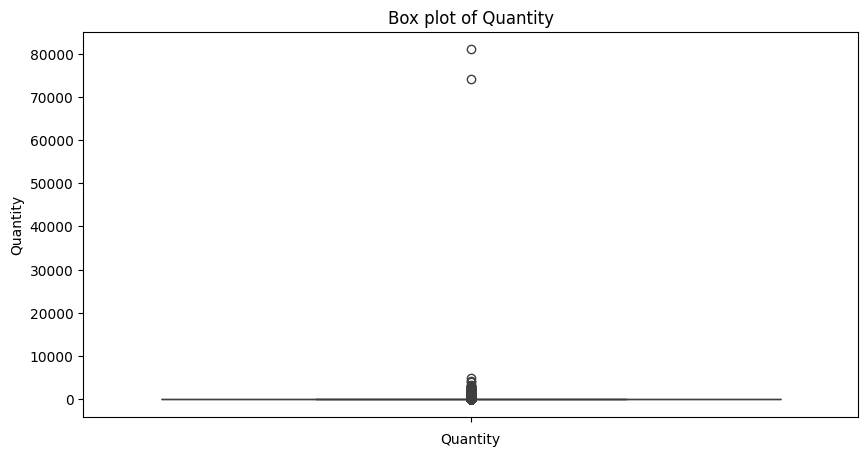

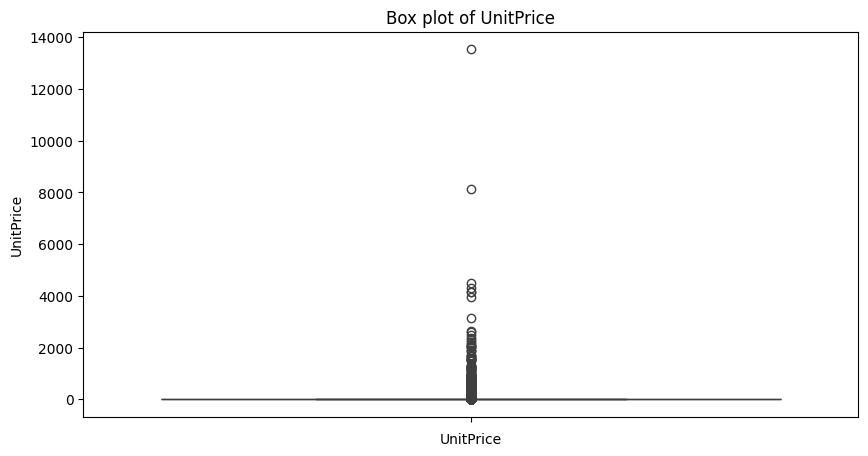

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize potential outliers in 'Quantity'
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['Quantity'])
plt.title('Box plot of Quantity')
plt.xlabel('Quantity')
plt.show()

# Visualize potential outliers in 'UnitPrice'
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['UnitPrice'])
plt.title('Box plot of UnitPrice')
plt.xlabel('UnitPrice')
plt.show()

Kh√° l√† nhi·ªÅu gi√° tr·ªã b·∫•t th∆∞·ªùng n√™n s·∫Ω l√†m th√™m 1 v√†i bi·ªÉu ƒë·ªì ƒë·ªÉ xem r√µ h∆°n

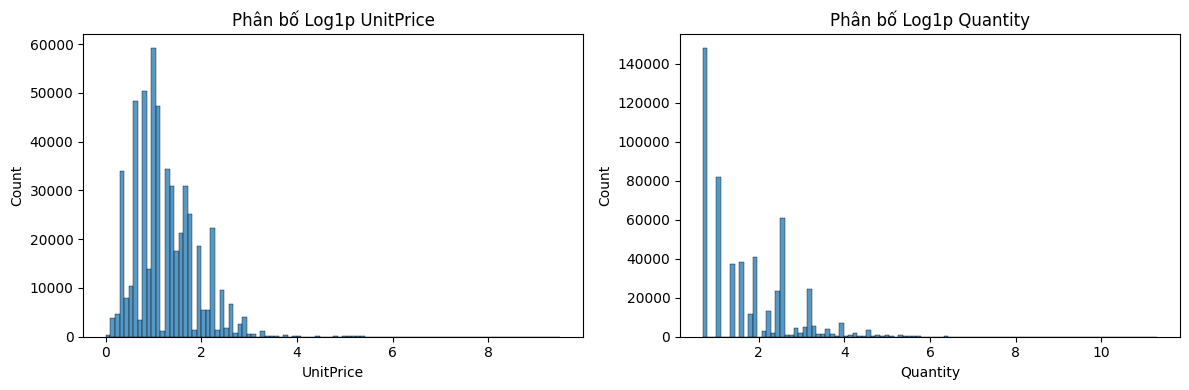

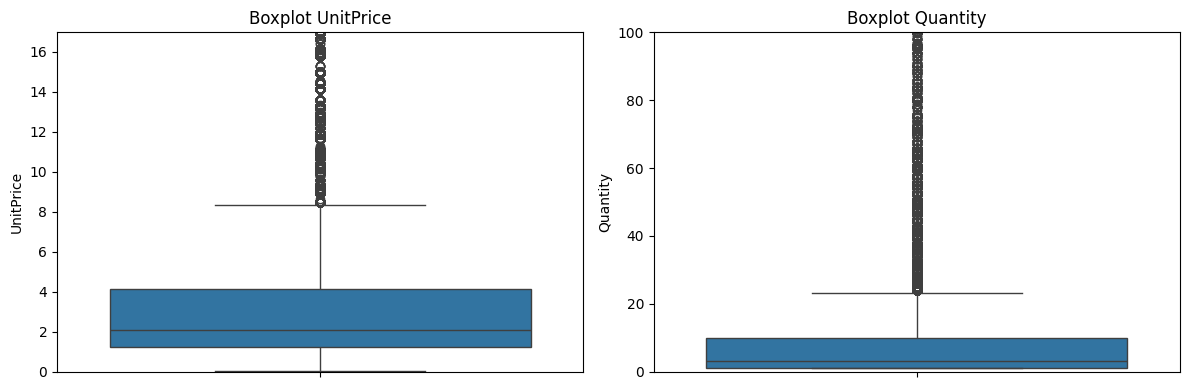

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Histogram: xem ph√¢n b·ªë chung
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(np.log1p(df['UnitPrice']), bins=100, ax=axes[0])
axes[0].set_title('Ph√¢n b·ªë Log1p UnitPrice')

sns.histplot(np.log1p(df['Quantity']), bins=100, ax=axes[1])
axes[1].set_title('Ph√¢n b·ªë Log1p Quantity')
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

# 2) Boxplot: d·ªÖ nh√¨n outlier
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(y=df['UnitPrice'], ax=axes[0])
axes[0].set_title('Boxplot UnitPrice')
axes[0].set_ylim(0, df['UnitPrice'].quantile(0.99)) # Limit y-axis to 99th percentile


sns.boxplot(y=df['Quantity'], ax=axes[1])
axes[1].set_title('Boxplot Quantity')
axes[1].set_ylim(0, df['Quantity'].quantile(0.99)) # Limit y-axis to 99th percentile
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

Th√¨ sau nh√¨n bi·ªÉu ƒë·ªì th√¨ ta c√≥ th·ªÉ th·∫•y r√µ l√† c√≥ kh√° nhi·ªÅu d·ªØ li·ªáu ngo·∫°i lai nh∆∞ng ch√∫ng ta c√≥ th·ªÉ gi·ªØ ƒë·ªÉ d√πng cho ph√¢n nh√≥m kh√°ch h√†ng v√† c√≥ th·ªÉ x·ª≠ l√Ω sau

In [ ]:
num_transactions = df['InvoiceNo'].nunique()
num_customers = df['CustomerID'].nunique()
num_products = df['StockCode'].nunique()
num_countries = df['Country'].nunique()


print(f"S·ªë l∆∞·ª£ng giao d·ªãch: {num_transactions}")
print(f"S·ªë l∆∞·ª£ng kh√°ch h√†ng: {num_customers}")
print(f"S·ªë l∆∞·ª£ng s·∫£n ph·∫©m: {num_products}")
print(f"S·ªë l∆∞·ª£ng c√°c qu·ªëc gia: {num_countries}")
print("d·ªØ li·ªáu sau khi l√†m s·∫°ch", df.shape)
print(df.info())


S·ªë l∆∞·ª£ng giao d·ªãch: 19959
S·ªë l∆∞·ª£ng kh√°ch h√†ng: 4339
S·ªë l∆∞·ª£ng s·∫£n ph·∫©m: 3921
S·ªë l∆∞·ª£ng c√°c qu·ªëc gia: 38
d·ªØ li·ªáu sau khi l√†m s·∫°ch (530103, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 530103 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530103 non-null  object        
 1   StockCode    530103 non-null  object        
 2   Description  530103 non-null  object        
 3   Quantity     530103 non-null  int64         
 4   InvoiceDate  530103 non-null  datetime64[ns]
 5   UnitPrice    530103 non-null  float64       
 6   CustomerID   530103 non-null  float64       
 7   Country      530103 non-null  object        
 8   Day          530103 non-null  int32         
 9   Hour         530103 non-null  int32         
 10  Month        530103 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(

# Ph√¢n t√≠ch kh√°m ph√° d·ªØ li·ªáu (EDA)

## T√≠nh to√°n c·ªôt doanh thu

T·∫°o m·ªôt c·ªôt m·ªõi t√≠nh to√°n doanh thu cho m·ªói d√≤ng d·ªØ li·ªáu (`Quantity * UnitPrice`).


In [ ]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
display(df.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Day  Hour  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    1     8   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    1     8   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8   

   Month  Amount  
0     12   15.30  
1     12   20.34  
2     12   22.00  
3     12   20.34  
4     12   20.34

## Ph√¢n t√≠ch doanh thu theo th·ªùi gian

T·ªïng h·ª£p doanh thu theo ng√†y v√† tr·ª±c quan h√≥a xu h∆∞·ªõng doanh thu h√†ng ng√†y. T·ªïng h·ª£p doanh thu theo th√°ng v√† tr·ª±c quan h√≥a xu h∆∞·ªõng doanh thu h√†ng th√°ng.


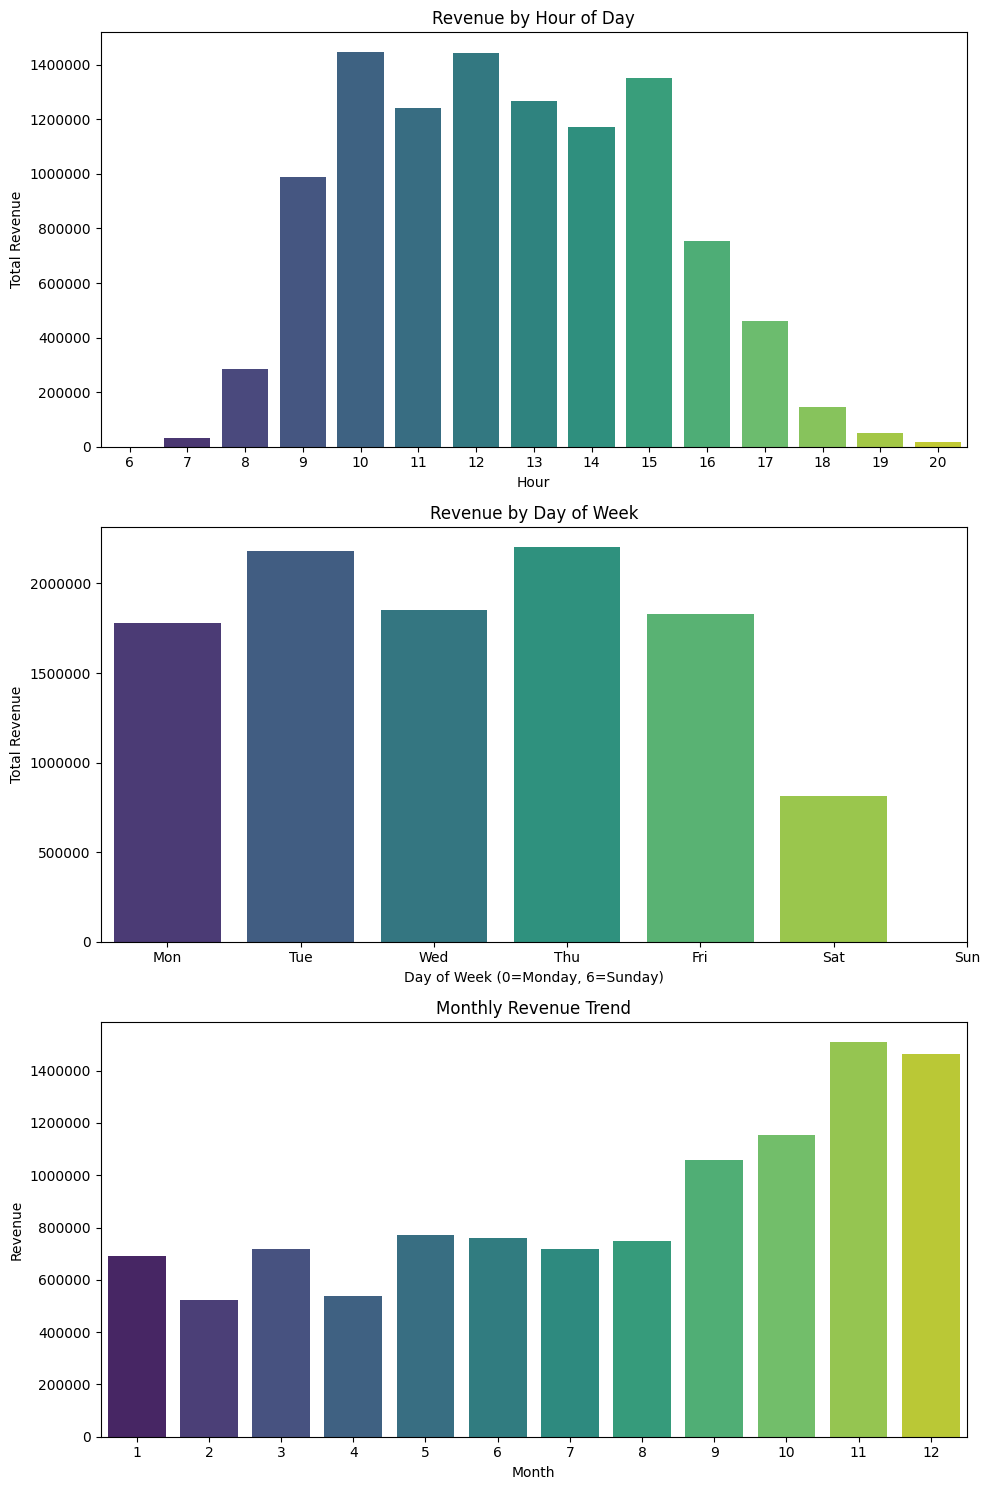

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for better organization
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Group by Hour and sum the 'Amount' for revenue by hour
revenue_by_hour = df.groupby('Hour')['Amount'].sum().reset_index()

# Plot revenue by hour of day
sns.barplot(x='Hour', y='Amount', data=revenue_by_hour, palette='viridis', ax=axes[0])
axes[0].set_title('Revenue by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Total Revenue')
axes[0].ticklabel_format(style='plain', axis='y') # Disable scientific notation on y-axis

# Group by DayOfWeek and sum the 'Amount' for revenue by day of week
revenue_by_dayofweek = df.groupby(df['InvoiceDate'].dt.dayofweek)['Amount'].sum().reset_index()
revenue_by_dayofweek = revenue_by_dayofweek.sort_values(by='InvoiceDate') # Sort by day of week (0=Monday, 6=Sunday)

# Plot revenue by day of week
sns.barplot(x='InvoiceDate', y='Amount', data=revenue_by_dayofweek, palette='viridis', ax=axes[1])
axes[1].set_title('Revenue by Day of Week')
axes[1].set_xlabel('Day of Week (0=Monday, 6=Sunday)')
axes[1].set_ylabel('Total Revenue')
axes[1].set_xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Set x-axis labels
axes[1].ticklabel_format(style='plain', axis='y') # Disable scientific notation on y-axis


# Group by Month and sum the 'Amount' for monthly revenue
monthly_revenue = df.groupby('Month')['Amount'].sum().reset_index()


# Plot monthly revenue trend
sns.barplot(data=monthly_revenue, x='Month', y='Amount', palette='viridis', ax=axes[2])
axes[2].set_title('Monthly Revenue Trend')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Revenue')
axes[2].ticklabel_format(style='plain', axis='y') # Disable scientific notation on y-axis

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

## X√°c ƒë·ªãnh s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t

T√≠nh t·ªïng doanh thu cho t·ª´ng s·∫£n ph·∫©m v√† x√°c ƒë·ªãnh 10 s·∫£n ph·∫©m c√≥ doanh thu cao nh·∫•t. T√≠nh t·ªïng s·ªë l∆∞·ª£ng b√°n ra cho t·ª´ng s·∫£n ph·∫©m v√† x√°c ƒë·ªãnh 10 s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t theo s·ªë l∆∞·ª£ng. Tr·ª±c quan h√≥a k·∫øt qu·∫£.


In [ ]:
# Calculate total revenue for each product and get the top 10
top_revenue_products = df.groupby('Description')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

# Calculate total quantity sold for each product and get the top 10
top_quantity_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

from IPython.display import display

# Gi·∫£ s·ª≠ ƒë√£ c√≥ 2 DataFrame: top_revenue_products, top_quantity_products
combined = pd.concat(
    [top_revenue_products, top_quantity_products],
    axis=1,
    keys=['Top by Revenue', 'Top by Quantity']  # ti√™u ƒë·ªÅ c·ªôt
)

display(combined)

Top by Revenue             \
                          Description     Amount   
0                      dotcom postage  206248.77   
1            regency cakestand 3 tier  174484.74   
2         paper craft , little birdie  168469.60   
3  white hanging heart t-light holder  106292.77   
4                       party bunting   99504.33   
5             jumbo bag red retrospot   94340.05   
6      medium ceramic top storage jar   81700.92   
7                              manual   78112.82   
8                             postage   78101.88   
9                  rabbit night light   66964.99   

                      Top by Quantity           
                          Description Quantity  
0         paper craft , little birdie    80995  
1      medium ceramic top storage jar    78033  
2   world war 2 gliders asstd designs    55047  
3             jumbo bag red retrospot    48474  
4  white hanging heart t-light holder    37891  
5                      popcorn holder    36761  
6       assorted colour bird ornament    36461  
7     pack of 72 retrospot cake cases    36419  
8                  rabbit night light    30788  
9              mini paint set vintage    26633

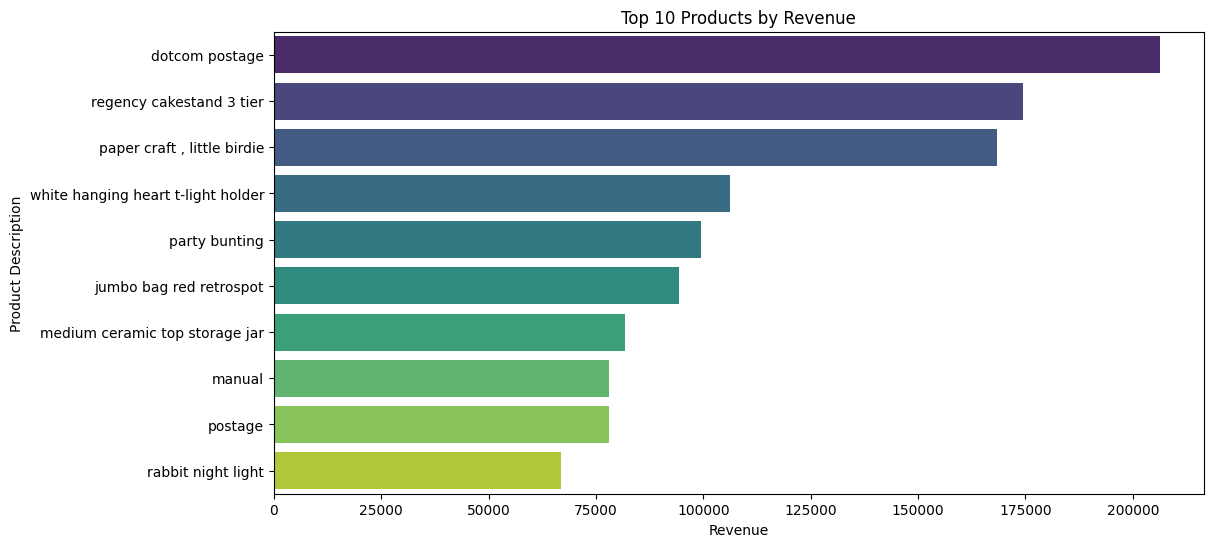

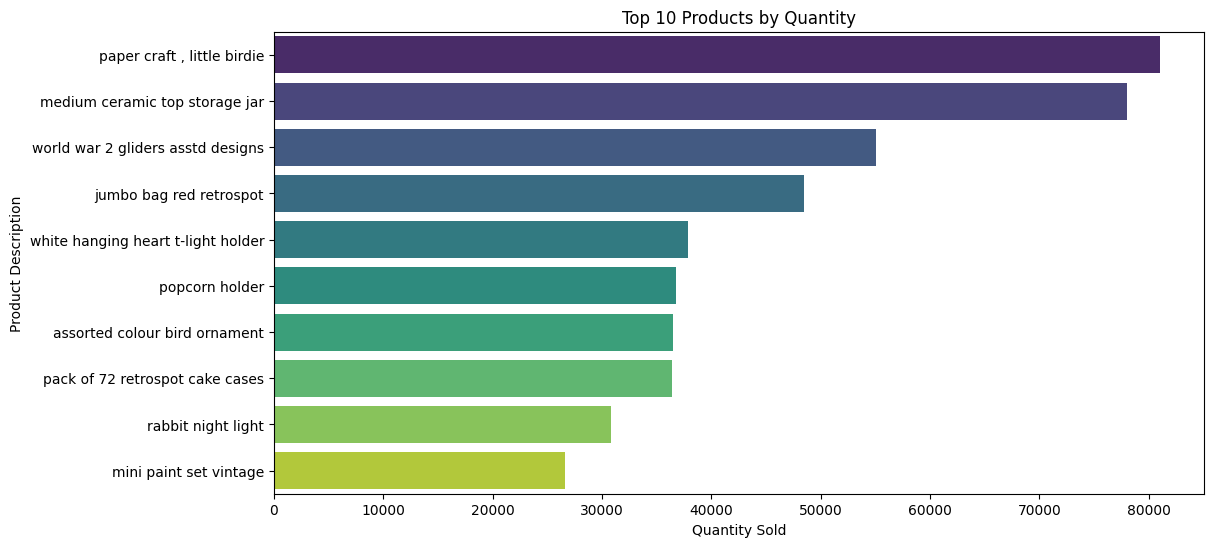

In [ ]:
# Plot top 10 products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Description', data=top_revenue_products, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.show()

# Plot top 10 products by quantity
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_quantity_products, palette='viridis')
plt.title('Top 10 Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

## Ph√¢n t√≠ch doanh thu theo qu·ªëc gia

T√≠nh t·ªïng doanh thu cho m·ªói qu·ªëc gia v√† x√°c ƒë·ªãnh c√°c qu·ªëc gia ƒë√≥ng g√≥p nhi·ªÅu doanh thu nh·∫•t. Tr·ª±c quan h√≥a doanh thu theo qu·ªëc gia.


In [ ]:
revenue_by_country = df.groupby('Country')['Amount'].sum().reset_index()
revenue_by_country = revenue_by_country.sort_values(by='Amount', ascending=False)
print("Doanh thu theo qu·ªëc gia:")
display(revenue_by_country)

Doanh thu theo qu·ªëc gia:


Country       Amount
36        United Kingdom  9014160.024
24           Netherlands   285446.340
10                  EIRE   283453.960
14               Germany   228867.140
13                France   209715.110
0              Australia   138521.310
31                 Spain    61577.110
33           Switzerland    57089.900
3                Belgium    41196.340
32                Sweden    38378.330
20                 Japan    37416.370
25                Norway    36165.440
27              Portugal    33747.100
12               Finland    22546.080
30             Singapore    21279.290
6        Channel Islands    20450.440
9                Denmark    18955.340
19                 Italy    17483.240
16             Hong Kong    15691.800
7                 Cyprus    13590.380
1                Austria    10198.680
18                Israel     8135.260
26                Poland     7334.650
15                Greece     4760.520
37           Unspecified     4749.790
17               Iceland     4310.000
5                 Canada     3666.380
34                   USA     3580.390
23                 Malta     2725.590
35  United Arab Emirates     1902.280
21               Lebanon     1693.880
22             Lithuania     1661.060
11    European Community     1300.250
4                 Brazil     1143.600
28                   RSA     1002.310
8         Czech Republic      826.740
2                Bahrain      754.140
29          Saudi Arabia      145.920

In [ ]:
import plotly.express as px

# Calculate total revenue, number of unique invoices, and number of unique customers per country
country_analysis = df.groupby('Country').agg(
    TotalRevenue=('Amount', 'sum'),
    NumberOfOrders=('InvoiceNo', 'nunique'),
    NumberOfCustomers=('CustomerID', 'nunique')
).reset_index()

# Create a treemap for revenue proportion by country, including additional data on hover
fig = px.treemap(country_analysis, path=['Country'], values='TotalRevenue',
                 title='Proportion of Total Revenue by Country',
                 hover_data=['NumberOfOrders', 'NumberOfCustomers']) # Add hover data
fig.show()

## Ph√¢n t√≠ch doanh thu theo th·ªùi gian trong ng√†y

T·ªïng h·ª£p doanh thu theo gi·ªù trong ng√†y v√† tr·ª±c quan h√≥a.


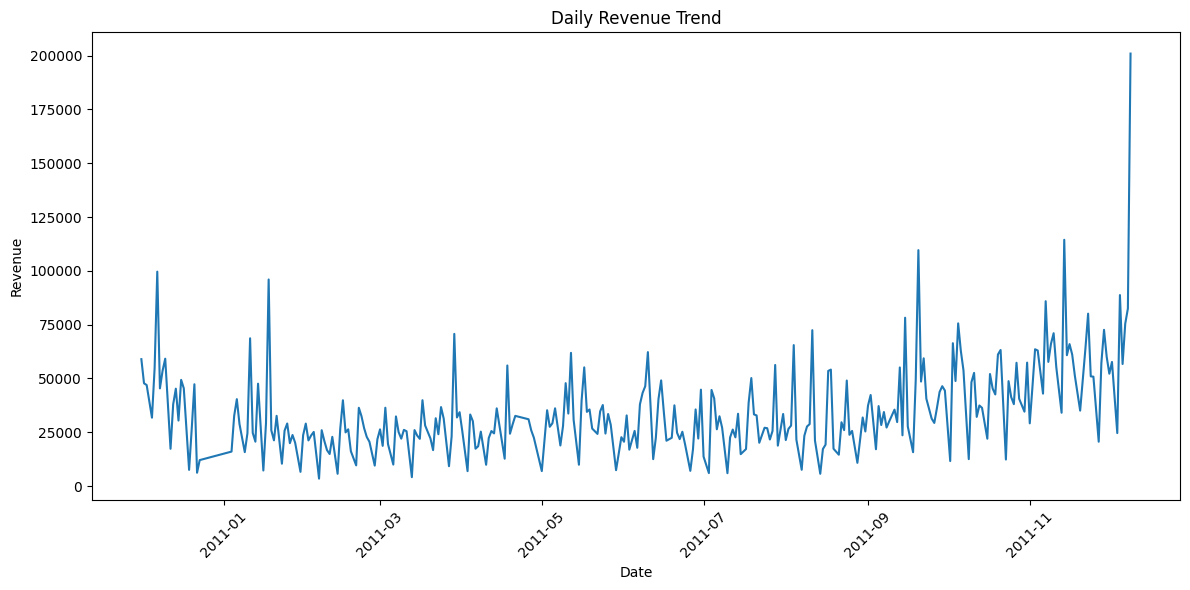

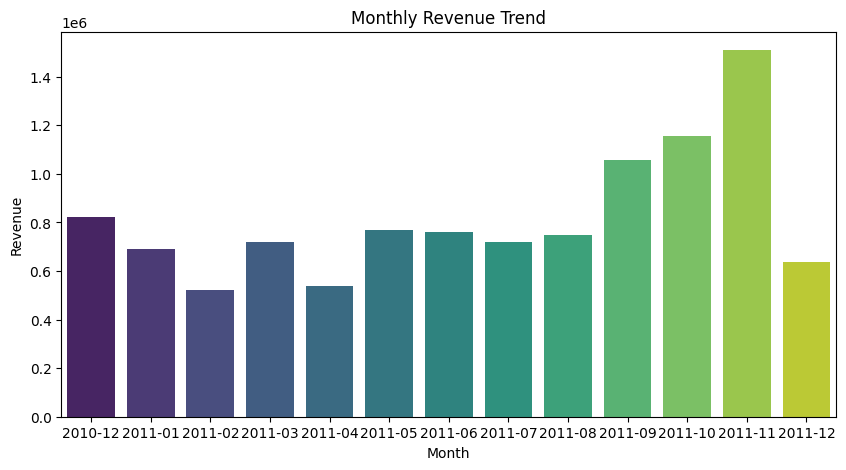

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate daily revenue
daily_revenue = df.groupby(df['InvoiceDate'].dt.date)['Amount'].sum().reset_index()
daily_revenue['InvoiceDate'] = pd.to_datetime(daily_revenue['InvoiceDate']) # Convert back to datetime for plotting

# Plot daily revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='Amount', data=daily_revenue)
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate monthly revenue
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Amount'].sum().reset_index()
monthly_revenue['InvoiceDate'] = monthly_revenue['InvoiceDate'].astype(str) # Convert Period to string for plotting

# Plot monthly revenue trend
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_revenue, x='InvoiceDate', y='Amount', palette='viridis')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

## Ph√¢n t√≠ch ph√¢n ph·ªëi k√≠ch c·ª° gi·ªè h√†ng

T√≠nh s·ªë l∆∞·ª£ng s·∫£n ph·∫©m trong m·ªói h√≥a ƒë∆°n (k√≠ch c·ª° gi·ªè h√†ng). Tr·ª±c quan h√≥a ph√¢n b·ªë k√≠ch c·ª° gi·ªè h√†ng.


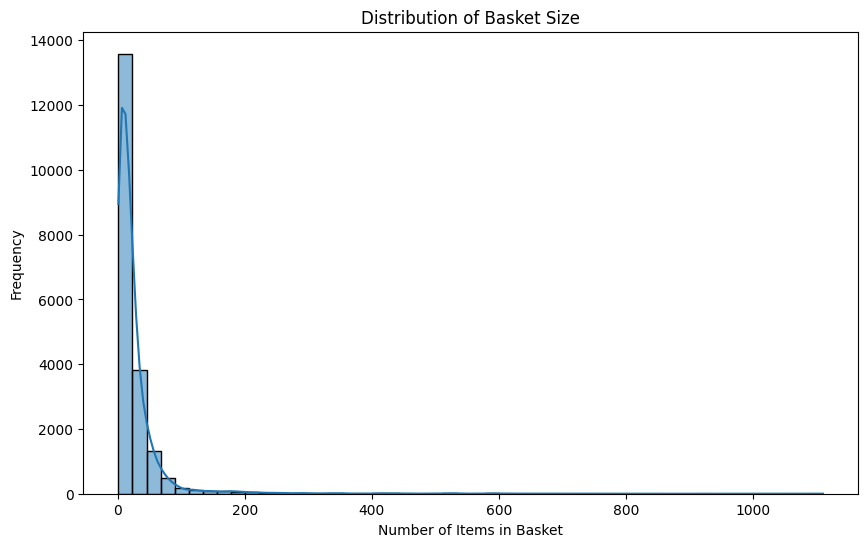

In [ ]:
basket_size = df.groupby('InvoiceNo')['StockCode'].nunique().reset_index()
basket_size.rename(columns={'StockCode': 'BasketSize'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(basket_size['BasketSize'], bins=50, kde=True)
plt.title('Distribution of Basket Size')
plt.xlabel('Number of Items in Basket')
plt.ylabel('Frequency')
plt.show()

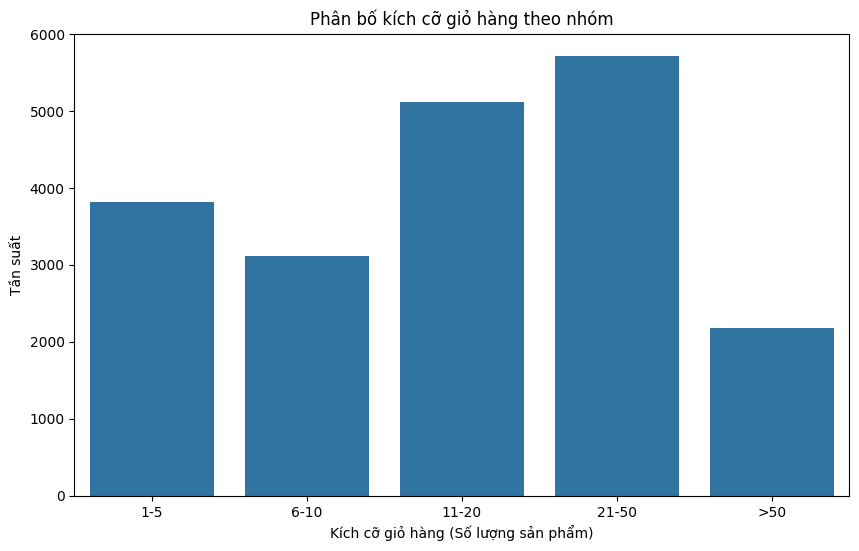

In [ ]:
bins = [0, 5, 10, 20, 50, 1000]
labels = ["1-5", "6-10", "11-20", "21-50", ">50"]

if isinstance(basket_size, pd.DataFrame) and 'BasketSize' in basket_size.columns:
    basket_bins = pd.cut(basket_size['BasketSize'], bins=bins, labels=labels, right=False)
elif isinstance(basket_size, pd.Series):
    basket_bins = pd.cut(basket_size, bins=bins, labels=labels, right=False)
else:
    print("Error: basket_size is not in the expected format (DataFrame with 'BasketSize' or Series)")
    basket_bins = None # Or handle the error appropriately

if basket_bins is not None:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=basket_bins, order=labels)
    plt.title("Ph√¢n b·ªë k√≠ch c·ª° gi·ªè h√†ng theo nh√≥m")
    plt.xlabel("K√≠ch c·ª° gi·ªè h√†ng (S·ªë l∆∞·ª£ng s·∫£n ph·∫©m)")
    plt.ylabel("T·∫ßn su·∫•t")
    plt.show()

# Ph√¢n kh√∫c kh√°ch h√†ng theo RFM

## T√≠nh to√°n ch·ªâ s·ªë rfm

T√≠nh Recency, Frequency, v√† Monetary cho t·ª´ng kh√°ch h√†ng.
- Nh∆∞ng tr∆∞·ªõc h·∫øt th√¨ ph·∫£i x·ª≠ l√Ω c√°c kh√°ch h√†ng c√≥ id l√† 0 v√¨ trong ph·∫ßn n√†y ch√∫ng ta s·∫Ω ph√¢n c·ª•m ƒë·ªÉ t√¨m ra group c√°c kh√°ch h√†ng  vip, mua 1 l·∫ßn v√† trung b√¨nh n·∫øu ƒë·ªÉ id l√† 0 th√¨ n√≥ s·∫Ω coi l√† 1 kh√°ch h√†ng v√† s·∫Ω ·∫£nh h∆∞·ªüng ƒë·∫øn ph√¢n c·ª•m



In [ ]:
from datetime import datetime

# Create a copy of the dataframe for RFM analysis
df_rfm = df.copy()

# Remove rows where CustomerID is 0
df_rfm = df_rfm[df_rfm['CustomerID'] != 0]

# Determine the analysis date
analysis_date = df_rfm['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate Recency
recency_df = df_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (analysis_date - recency_df['InvoiceDate']).dt.days
recency_df = recency_df[['CustomerID', 'Recency']]

# Calculate Frequency
frequency_df = df_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Calculate Monetary
monetary_df = df_rfm.groupby('CustomerID')['Amount'].sum().reset_index()
monetary_df.rename(columns={'Amount': 'Monetary'}, inplace=True)

# Merge R, F, and M into a single DataFrame
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

print("RFM DataFrame after removing CustomerID 0:")
display(rfm_df.head())
print("\nShape of RFM DataFrame:", rfm_df.shape)

RFM DataFrame after removing CustomerID 0:


CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


Shape of RFM DataFrame: (4338, 4)


## X·ª≠ l√Ω ngo·∫°i l·ªá v√† t·∫°o nh√≥m vip

X√°c ƒë·ªãnh v√† t√°ch c√°c kh√°ch h√†ng chi ti√™u l·ªõn th√†nh m·ªôt nh√≥m VIP ri√™ng.


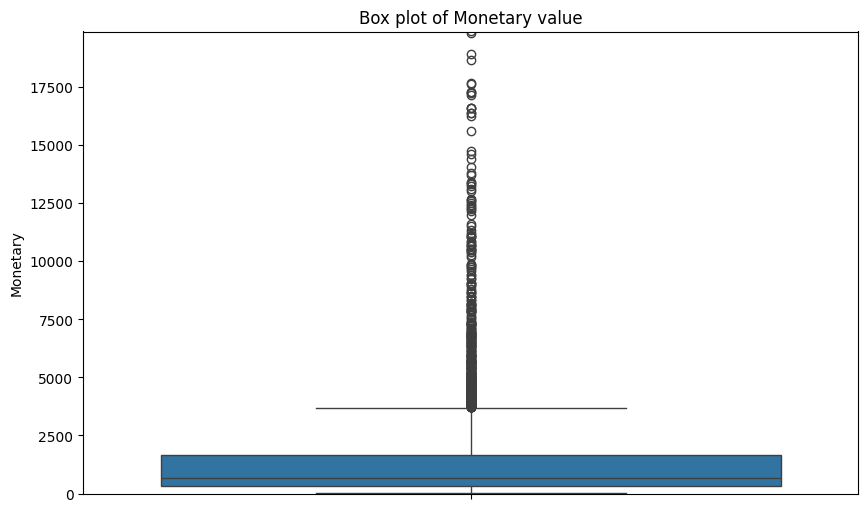

VIP Customers (identified by IQR method):


CustomerID  Recency  Frequency  Monetary
0      12346.0      326          1  77183.60
1      12347.0        2          7   4310.00
10     12357.0       33          1   6207.67
12     12359.0       58          4   6372.58
15     12362.0        3         10   5226.23


RFM DataFrame after removing VIP customers:


CustomerID  Recency  Frequency  Monetary
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40
5     12352.0       36          8   2506.04
6     12353.0      204          1     89.00


Shape of VIP Customers DataFrame: (427, 4)
Shape of RFM DataFrame after removing VIP customers: (3911, 4)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of Monetary value to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=rfm_df['Monetary'])
plt.title('Box plot of Monetary value')
plt.ylabel('Monetary')
plt.ylim(0, rfm_df['Monetary'].quantile(0.99)) # Limit y-axis to 99th percentile for better visualization
plt.show()

# Calculate IQR for Monetary value
Q1 = rfm_df['Monetary'].quantile(0.25)
Q3 = rfm_df['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Determine the threshold for VIP customers using the IQR rule (Q3 + 1.5 * IQR)
vip_threshold = Q3 + 1.5 * IQR

# Create a DataFrame for VIP customers
vip_customers_df = rfm_df[rfm_df['Monetary'] >= vip_threshold].copy()

# Remove VIP customers from the original rfm_df
rfm_df = rfm_df[rfm_df['Monetary'] < vip_threshold].copy()

print("VIP Customers (identified by IQR method):")
display(vip_customers_df.head())
print("\nRFM DataFrame after removing VIP customers:")
display(rfm_df.head())
print("\nShape of VIP Customers DataFrame:", vip_customers_df.shape)
print("Shape of RFM DataFrame after removing VIP customers:", rfm_df.shape)

## Chu·∫©n h√≥a d·ªØ li·ªáu rfm
√Åp d·ª•ng c√°c ph√©p bi·∫øn ƒë·ªïi (v√≠ d·ª•: log, box-cox) v√† chu·∫©n h√≥a d·ªØ li·ªáu RFM ƒë·ªÉ chu·∫©n b·ªã cho ph√¢n c·ª•m.


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select RFM columns for transformation and scaling
rfm_columns = ['Recency', 'Frequency', 'Monetary']
rfm_data = rfm_df[rfm_columns]

# Apply log transformation (using log1p to handle zero values)
rfm_log = np.log1p(rfm_data)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the log-transformed data
rfm_scaled = scaler.fit_transform(rfm_log)

# Create a new DataFrame with scaled RFM data and CustomerID
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_columns)
rfm_scaled_df['CustomerID'] = rfm_df['CustomerID'].values # Add CustomerID back

# Display the first 5 rows and info of the scaled DataFrame
display(rfm_scaled_df.head())
print("\nTh√¥ng tin c·ªßa DataFrame RFM ƒë√£ chu·∫©n h√≥a:")
print(rfm_scaled_df.info())

Recency  Frequency  Monetary  CustomerID
0  0.278255   0.764612  1.143853     12348.0
1 -0.769174  -0.988622  1.121784     12349.0
2  1.383789  -0.988622 -0.516590     12350.0
3 -0.286505   1.889285  1.472428     12352.0
4  1.056785  -0.988622 -1.817378     12353.0


Th√¥ng tin c·ªßa DataFrame RFM ƒë√£ chu·∫©n h√≥a:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     3911 non-null   float64
 1   Frequency   3911 non-null   float64
 2   Monetary    3911 non-null   float64
 3   CustomerID  3911 non-null   float64
dtypes: float64(4)
memory usage: 122.3 KB
None


## X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng c·ª•m t·ªëi ∆∞u

S·ª≠ d·ª•ng c√°c ph∆∞∆°ng ph√°p nh∆∞ Elbow method ho·∫∑c Silhouette score ƒë·ªÉ t√¨m s·ªë l∆∞·ª£ng c·ª•m ph√π h·ª£p cho K-means.


Inertia and Silhouette Scores for each k:
For k = 2, Inertia = 5962.58, Silhouette Score = 0.28
For k = 3, Inertia = 4669.50, Silhouette Score = 0.42
For k = 4, Inertia = 3668.54, Silhouette Score = 0.31
For k = 5, Inertia = 3169.89, Silhouette Score = 0.33
For k = 6, Inertia = 2745.23, Silhouette Score = 0.31
For k = 7, Inertia = 2473.18, Silhouette Score = 0.30
For k = 8, Inertia = 2281.98, Silhouette Score = 0.28
For k = 9, Inertia = 2096.32, Silhouette Score = 0.28
For k = 10, Inertia = 1950.46, Silhouette Score = 0.28


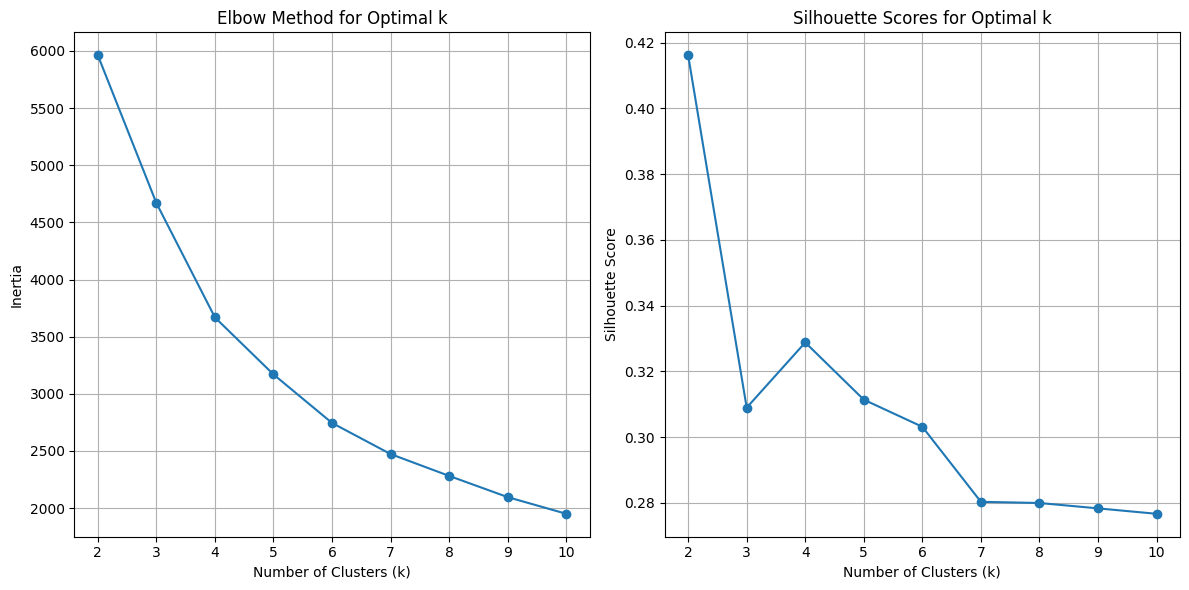

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create empty lists to store inertia and silhouette scores
inertia = []
silhouette_scores = [] # Now including silhouette scores

# Iterate through a range of possible cluster numbers
# We will try from 2 to 10 clusters
k_range = range(2, 11)

for k in k_range:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the KMeans model to the scaled RFM data (excluding CustomerID)
    kmeans.fit(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

    # Append the model's inertia to the inertia list
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score for k > 1
    if k > 1:
        score = silhouette_score(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']], kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None) # Append None for k=1 as silhouette score is not defined


# Print inertia and silhouette values for each k
print("Inertia and Silhouette Scores for each k:")
for i, k in enumerate(k_range):
    if k > 1:
        print(f"For k = {k}, Inertia = {inertia[i]:.2f}, Silhouette Score = {silhouette_scores[i-1]:.2f}") # Adjust index for silhouette_scores
    else:
         print(f"For k = {k}, Inertia = {inertia[i]:.2f}, Silhouette Score = N/A")


# Create subplots for both Elbow method and Silhouette score
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # Adjusted figure size for two plots

# Plot the inertia values (Elbow method)
axes[0].plot(k_range, inertia, marker='o')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(k_range)
axes[0].grid(True)


# Plot the silhouette scores
# Filter out None values for plotting
k_range_silhouette = [k for k in k_range if k > 1]
silhouette_scores_filtered = [score for score in silhouette_scores if score is not None]


axes[1].plot(k_range_silhouette, silhouette_scores_filtered, marker='o')
axes[1].set_title('Silhouette Scores for Optimal k')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_range_silhouette)
axes[1].grid(True)


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

## Th·ª±c hi·ªán ph√¢n c·ª•m k-means
√Åp d·ª•ng thu·∫≠t to√°n K-means ƒë·ªÉ ph√¢n nh√≥m c√°c kh√°ch h√†ng c√≤n l·∫°i.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

# --- Perform K-means Clustering ---
# Choose the optimal number of clusters (e.g., based on Elbow or Silhouette plots)
# Let's choose k=3 for demonstration based on the silhouette scores and elbow plot
n_clusters = 3 # You can change this based on your analysis in the previous step

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit the KMeans model to the scaled RFM data (excluding CustomerID)
kmeans.fit(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

# Add the cluster labels to the original rfm_df DataFrame
rfm_df['Cluster_Label'] = kmeans.labels_


# --- 1. T√≠nh trung b√¨nh RFM cho t·ª´ng c·ª•m ---
cluster_summary = rfm_df.groupby('Cluster_Label')[['Recency','Frequency','Monetary']].mean().reset_index()

# --- 2. H√†m g√°n nh√£n c·ª•m ---
def assign_cluster_name(row):
    # VIP: mua th∆∞·ªùng xuy√™n, chi ti√™u r·∫•t cao, m·ªõi mua g·∫ßn ƒë√¢y
    if row['Recency'] <= 30 and row['Frequency'] > 10 and row['Monetary'] > 5000:
        return 'VIP'
    # Best Customers: mua nhi·ªÅu v√† ƒë·ªÅu, g·∫ßn ƒë√¢y
    elif row['Recency'] <= 60 and row['Frequency'] > 5:
        return 'Kh√°ch h√†ng t·ªët nh·∫•t'
    # Inactive: l√¢u kh√¥ng mua, √≠t giao d·ªãch
    elif row['Recency'] > 90 and row['Frequency'] <= 2:
        return 'Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông'
    # C√≤n l·∫°i: kh√°ch c·∫ßn quan t√¢m
    else:
        return 'Kh√°ch h√†ng c·∫ßn ch√∫ √Ω'

cluster_summary['Cluster_Name'] = cluster_summary.apply(assign_cluster_name, axis=1)

# --- 3. Map nh√£n v√†o rfm_df ---
cluster_map = dict(zip(cluster_summary['Cluster_Label'], cluster_summary['Cluster_Name']))
rfm_df['Cluster_Name'] = rfm_df['Cluster_Label'].map(cluster_map)

# --- 4. Th√™m VIP ngo√†i m√¥ h√¨nh (n·∫øu b·∫°n c√≥ t·∫≠p vip_customers_df ri√™ng) ---
if 'vip_customers_df' in locals():
    vip_customers_df['Cluster_Name'] = 'VIP'
    vip_customers_df['Cluster_Label'] = -1
    final_customer_segmentation = pd.concat([rfm_df, vip_customers_df], ignore_index=True)
else:
    final_customer_segmentation = rfm_df.copy()

# --- 5. Ki·ªÉm tra ph√¢n b·ªë ---
print("Ph√¢n b·ªë kh√°ch h√†ng theo ph√¢n kh√∫c:")
print(final_customer_segmentation['Cluster_Name'].value_counts())

# --- 6. Visualize Clusters (Optional: Add visualizations here if needed) ---
# Example: Scatter plot of clusters
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='Recency', y='Frequency', hue='Cluster_Name', data=final_customer_segmentation, palette='viridis')
# plt.title('Customer Segmentation based on RFM')
# plt.show()


# --- 7. V·∫Ω scatter 3D ---
fig = px.scatter_3d(
    final_customer_segmentation,
    x='Recency', y='Frequency', z='Monetary',
    color='Cluster_Name',
    title='Ph√¢n kh√∫c kh√°ch h√†ng RFM (3D)',
    labels={'Recency':'Recency (ng√†y)', 'Frequency':'Frequency (s·ªë ƒë∆°n)', 'Monetary':'Monetary (doanh thu)'},
    hover_data=['CustomerID']
)
fig.show()

Ph√¢n b·ªë kh√°ch h√†ng theo ph√¢n kh√∫c:
Cluster_Name
Kh√°ch h√†ng c·∫ßn ch√∫ √Ω                 1483
Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông    1473
Kh√°ch h√†ng t·ªët nh·∫•t                   955
VIP                                   427
Name: count, dtype: int64


## Di·ªÖn gi·∫£i k·∫øt qu·∫£ ph√¢n c·ª•m


In [ ]:
cluster_analysis_non_vip = rfm_df.groupby('Cluster_Name')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

print("Gi√° tr·ªã RFM trung b√¨nh cho c√°c c·ª•m (tr·ª´ VIP):")
display(cluster_analysis_non_vip)

# Calculate and display mean RFM values for the VIP cluster
cluster_analysis_vip = vip_customers_df[['Recency', 'Frequency', 'Monetary']].mean().to_frame().T
cluster_analysis_vip['Cluster_Name'] = 'VIP'

print("\nGi√° tr·ªã RFM trung b√¨nh cho c·ª•m VIP:")
display(cluster_analysis_vip)

# Combine the analysis for all clusters (including VIP)
cluster_analysis_all = pd.concat([cluster_analysis_non_vip, cluster_analysis_vip], ignore_index=True)
print("\nT·ªïng h·ª£p gi√° tr·ªã RFM trung b√¨nh cho t·∫•t c·∫£ c√°c c·ª•m:")
display(cluster_analysis_all)


# Count the number of customers in each cluster
cluster_counts = final_customer_segmentation['Cluster_Name'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_Name', 'Customer_Count']

print("\nS·ªë l∆∞·ª£ng kh√°ch h√†ng trong m·ªói c·ª•m:")
display(cluster_counts)

# Interpret the clusters based on their mean RFM values:
print("\nDi·ªÖn gi·∫£i ƒë·∫∑c tr∆∞ng c·ªßa t·ª´ng c·ª•m kh√°ch h√†ng:")
for index, row in cluster_analysis_all.iterrows():
    cluster_name = row['Cluster_Name']
    recency = row['Recency']
    frequency = row['Frequency']
    monetary = row['Monetary']
    count = cluster_counts[cluster_counts['Cluster_Name'] == cluster_name]['Customer_Count'].iloc[0]

    print(f"\n--- C·ª•m: {cluster_name} (S·ªë l∆∞·ª£ng kh√°ch h√†ng: {count}) ---")
    print(f"- Recency trung b√¨nh: {recency:.2f} ng√†y")
    print(f"- Frequency trung b√¨nh: {frequency:.2f} ƒë∆°n h√†ng")
    print(f"- Monetary trung b√¨nh: {monetary:.2f} ")


Gi√° tr·ªã RFM trung b√¨nh cho c√°c c·ª•m (tr·ª´ VIP):


Cluster_Name     Recency  Frequency     Monetary
0               Kh√°ch h√†ng c·∫ßn ch√∫ √Ω   71.899528   2.416723   844.523198
1  Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông  176.094365   1.186694   261.828086
2                Kh√°ch h√†ng t·ªët nh·∫•t   25.800000   6.332984  1915.816984


Gi√° tr·ªã RFM trung b√¨nh cho c·ª•m VIP:


Recency  Frequency      Monetary Cluster_Name
0  25.222482  16.749415  12748.716651          VIP


T·ªïng h·ª£p gi√° tr·ªã RFM trung b√¨nh cho t·∫•t c·∫£ c√°c c·ª•m:


Cluster_Name     Recency  Frequency      Monetary
0               Kh√°ch h√†ng c·∫ßn ch√∫ √Ω   71.899528   2.416723    844.523198
1  Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông  176.094365   1.186694    261.828086
2                Kh√°ch h√†ng t·ªët nh·∫•t   25.800000   6.332984   1915.816984
3                                VIP   25.222482  16.749415  12748.716651


S·ªë l∆∞·ª£ng kh√°ch h√†ng trong m·ªói c·ª•m:


Cluster_Name  Customer_Count
0               Kh√°ch h√†ng c·∫ßn ch√∫ √Ω            1483
1  Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông            1473
2                Kh√°ch h√†ng t·ªët nh·∫•t             955
3                                VIP             427


Di·ªÖn gi·∫£i ƒë·∫∑c tr∆∞ng c·ªßa t·ª´ng c·ª•m kh√°ch h√†ng:

--- C·ª•m: Kh√°ch h√†ng c·∫ßn ch√∫ √Ω (S·ªë l∆∞·ª£ng kh√°ch h√†ng: 1483) ---
- Recency trung b√¨nh: 71.90 ng√†y
- Frequency trung b√¨nh: 2.42 ƒë∆°n h√†ng
- Monetary trung b√¨nh: 844.52 

--- C·ª•m: Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông (S·ªë l∆∞·ª£ng kh√°ch h√†ng: 1473) ---
- Recency trung b√¨nh: 176.09 ng√†y
- Frequency trung b√¨nh: 1.19 ƒë∆°n h√†ng
- Monetary trung b√¨nh: 261.83 

--- C·ª•m: Kh√°ch h√†ng t·ªët nh·∫•t (S·ªë l∆∞·ª£ng kh√°ch h√†ng: 955) ---
- Recency trung b√¨nh: 25.80 ng√†y
- Frequency trung b√¨nh: 6.33 ƒë∆°n h√†ng
- Monetary trung b√¨nh: 1915.82 

--- C·ª•m: VIP (S·ªë l∆∞·ª£ng kh√°ch h√†ng: 427) ---
- Recency trung b√¨nh: 25.22 ng√†y
- Frequency trung b√¨nh: 16.75 ƒë∆°n h√†ng
- Monetary trung b√¨nh: 12748.72 




### C·ª•m 1: Kh√°ch h√†ng c·∫ßn ch√∫ √Ω (Kh√°ch h√†ng c√≥ nguy c∆° r·ªùi b·ªè)

* **ƒê·∫∑c ƒëi·ªÉm:** ƒê√£ l√¢u kh√¥ng mua s·∫Øm (Recency cao), t·∫ßn su·∫•t v√† gi√° tr·ªã chi ti√™u ·ªü m·ª©c trung b√¨nh. ƒê√¢y l√† nh·ªØng kh√°ch h√†ng c√≥ kh·∫£ nƒÉng cao s·∫Ω ng·ª´ng mua h√†ng ho√†n to√†n.
* **M·ª•c ti√™u:** K√≠ch ho·∫°t l·∫°i s·ª± quan t√¢m v√† khuy·∫øn kh√≠ch h·ªç quay tr·ªü l·∫°i mua s·∫Øm.
* **Chi·∫øn l∆∞·ª£c:**
    * **G·ª≠i email/tin nh·∫Øn c√° nh√¢n h√≥a:** G·ª≠i c√°c ∆∞u ƒë√£i ƒë·∫∑c bi·ªát c√≥ th·ªùi h·∫°n, nh∆∞ m√£ gi·∫£m gi√° 10-15% cho l·∫ßn mua h√†ng ti·∫øp theo, k√®m theo l·ªùi nh·∫Øc v·ªÅ c√°c s·∫£n ph·∫©m h·ªç y√™u th√≠ch tr∆∞·ªõc ƒë√¢y.
    * **Gi·ªõi thi·ªáu s·∫£n ph·∫©m m·ªõi:** C·∫≠p nh·∫≠t th√¥ng tin v·ªÅ c√°c s·∫£n ph·∫©m ho·∫∑c b·ªô s∆∞u t·∫≠p m·ªõi, c√≥ th·ªÉ k√®m theo m·ªôt ∆∞u ƒë√£i nh·ªè ƒë·ªÉ k√≠ch th√≠ch h·ªç xem qua.
    * **Thu th·∫≠p ph·∫£n h·ªìi:** G·ª≠i kh·∫£o s√°t ng·∫Øn ƒë·ªÉ hi·ªÉu l√Ω do h·ªç kh√¥ng mua h√†ng g·∫ßn ƒë√¢y, c√≥ th·ªÉ t·∫∑ng m·ªôt phi·∫øu mua h√†ng nh·ªè nh∆∞ m·ªôt l·ªùi c·∫£m ∆°n.

---

### C·ª•m 2: Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông

* **ƒê·∫∑c ƒëi·ªÉm:** ƒê√£ r·∫•t l√¢u kh√¥ng mua s·∫Øm (Recency cao nh·∫•t), t·∫ßn su·∫•t v√† gi√° tr·ªã chi ti√™u th·∫•p nh·∫•t. Nh√≥m n√†y kh√≥ ƒë·ªÉ "k√≠ch ho·∫°t" l·∫°i.
* **M·ª•c ti√™u:** T·∫≠p trung v√†o c√°c chi·∫øn d·ªãch chi ph√≠ th·∫•p, c√≥ kh·∫£ nƒÉng cao t·∫°o ra chuy·ªÉn ƒë·ªïi.
* **Chi·∫øn l∆∞·ª£c:**
    * **Chi·∫øn d·ªãch Win-back:** G·ª≠i m·ªôt ∆∞u ƒë√£i c·ª±c k·ª≥ h·∫•p d·∫´n (v√≠ d·ª•: m√£ gi·∫£m gi√° 30% ho·∫∑c mi·ªÖn ph√≠ v·∫≠n chuy·ªÉn) ƒë·ªÉ thu h√∫t h·ªç quay l·∫°i, nh∆∞ng ch·ªâ n√™n th·ª±c hi·ªán v·ªõi nh·ªØng kh√°ch h√†ng c√≥ ti·ªÅm nƒÉng nh·∫•t trong nh√≥m n√†y.
    * **Lo·∫°i kh·ªèi chi·∫øn d·ªãch th∆∞·ªùng xuy√™n:** ƒê·ªÉ ti·∫øt ki·ªám chi ph√≠, kh√¥ng n√™n g·ª≠i c√°c email ho·∫∑c tin nh·∫Øn qu·∫£ng c√°o th√¥ng th∆∞·ªùng cho nh√≥m n√†y. T·∫≠p trung v√†o c√°c chi·∫øn d·ªãch ƒë·∫∑c bi·ªát.

---

### C·ª•m 3: Kh√°ch h√†ng t·ªët nh·∫•t

* **ƒê·∫∑c ƒëi·ªÉm:** Mua s·∫Øm th∆∞·ªùng xuy√™n (Frequency cao) v√† chi ti√™u ƒë√°ng k·ªÉ (Monetary cao). H·ªç l√† nh·ªØng ng∆∞·ªùi c√≥ gi√° tr·ªã cao nh·∫•t trong nh√≥m kh√°ch h√†ng th√¥ng th∆∞·ªùng.
* **M·ª•c ti√™u:** Duy tr√¨ s·ª± t∆∞∆°ng t√°c, tƒÉng l√≤ng trung th√†nh v√† khuy·∫øn kh√≠ch h·ªç mua s·∫Øm nhi·ªÅu h∆°n n·ªØa.
* **Chi·∫øn l∆∞·ª£c:**
    * **Ch∆∞∆°ng tr√¨nh kh√°ch h√†ng th√¢n thi·∫øt:** M·ªùi h·ªç tham gia v√†o m·ªôt ch∆∞∆°ng tr√¨nh t√≠ch ƒëi·ªÉm ho·∫∑c c·∫•p b·∫≠c cao h∆°n.
    * **∆Øu ƒë√£i ƒë·∫∑c bi·ªát:** G·ª≠i c√°c ∆∞u ƒë√£i d√†nh ri√™ng cho h·ªç (v√≠ d·ª•: "C·∫£m ∆°n b·∫°n ƒë√£ ƒë·ªìng h√†nh c√πng ch√∫ng t√¥i! ƒê√¢y l√† m√£ gi·∫£m gi√° 20% ƒë·∫∑c bi·ªát d√†nh cho b·∫°n").
    * **Gi·ªõi thi·ªáu tr∆∞·ªõc s·∫£n ph·∫©m:** Cho ph√©p h·ªç mua ho·∫∑c xem tr∆∞·ªõc c√°c s·∫£n ph·∫©m m·ªõi tr∆∞·ªõc khi ra m·∫Øt c√¥ng ch√∫ng.

---

### C·ª•m 4: Kh√°ch h√†ng VIP

* **ƒê·∫∑c ƒëi·ªÉm:** Chi ti√™u v∆∞·ª£t tr·ªôi (Monetary c·ª±c k·ª≥ cao), mua s·∫Øm r·∫•t th∆∞·ªùng xuy√™n v√† g·∫ßn ƒë√¢y. ƒê√¢y l√† "nh√≥m kh√°ch h√†ng v√†ng" c·ªßa b·∫°n.
* **M·ª•c ti√™u:** Nu√¥i d∆∞·ª°ng m·ªëi quan h·ªá, tƒÉng c∆∞·ªùng l√≤ng trung th√†nh v√† ƒë·∫£m b·∫£o h·ªç c·∫£m th·∫•y ƒë∆∞·ª£c tr√¢n tr·ªçng.
* **Chi·∫øn l∆∞·ª£c:**
    * **ChƒÉm s√≥c kh√°ch h√†ng ƒë·∫∑c bi·ªát:** Cung c·∫•p d·ªãch v·ª• chƒÉm s√≥c kh√°ch h√†ng ∆∞u ti√™n, c√≥ th·ªÉ c√≥ m·ªôt nh√¢n vi√™n h·ªó tr·ª£ ri√™ng.
    * **Qu√† t·∫∑ng v√† s·ª± ki·ªán ƒë·ªôc quy·ªÅn:** G·ª≠i qu√† t·∫∑ng v√†o d·ªãp sinh nh·∫≠t, ng√†y l·ªÖ, ho·∫∑c m·ªùi h·ªç tham d·ª± c√°c s·ª± ki·ªán ƒë·∫∑c bi·ªát d√†nh cho kh√°ch h√†ng VIP.
    * **C√° nh√¢n h√≥a t·ªëi ƒëa:** G·ª£i √Ω s·∫£n ph·∫©m d·ª±a tr√™n s·ªü th√≠ch c√° nh√¢n, l·ªãch s·ª≠ mua h√†ng, v√† t·∫°o tr·∫£i nghi·ªám mua s·∫Øm ƒë·∫≥ng c·∫•p nh·∫•t.



Profile trung b√¨nh RFM theo c·ª•m:


Recency  Frequency      Monetary
Cluster_Name                                                          
Kh√°ch h√†ng c·∫ßn ch√∫ √Ω                71.899528   2.416723    844.523198
Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông  176.094365   1.186694    261.828086
Kh√°ch h√†ng t·ªët nh·∫•t                 25.800000   6.332984   1915.816984
VIP                                 25.222482  16.749415  12748.716651


Profile (chu·∫©n h√≥a 0-1) ƒë·ªÉ so s√°nh tr·ª±c quan:


Recency  Frequency  Monetary
Cluster_Name                                                    
Kh√°ch h√†ng c·∫ßn ch√∫ √Ω              -0.046417  -0.695107 -0.605278
Kh√°ch h√†ng r·ªùi b·ªè/kh√¥ng ho·∫°t ƒë·ªông  1.647870  -0.896060 -0.719116
Kh√°ch h√†ng t·ªët nh·∫•t               -0.796031  -0.055297 -0.395985
VIP                               -0.805422   1.646464  1.720380

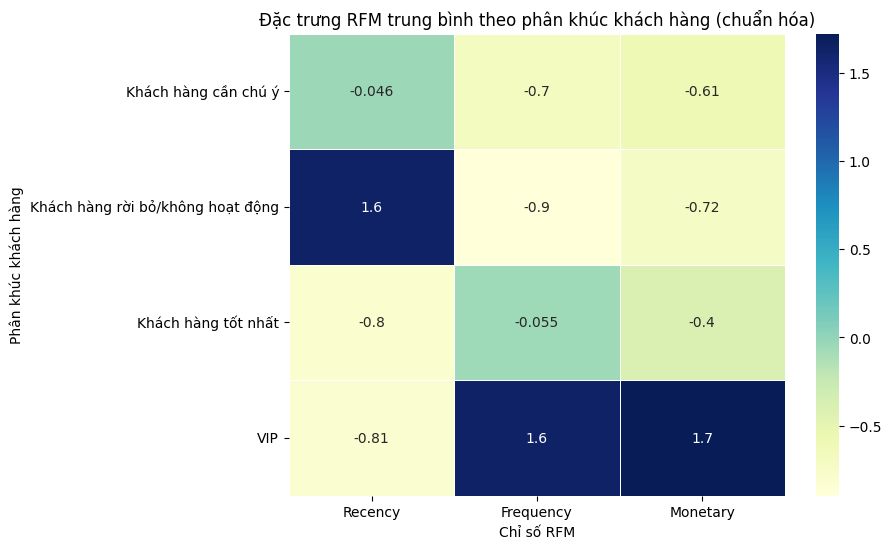

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- 1. T√≠nh profile trung b√¨nh RFM theo c·ª•m ---
cluster_profile = final_customer_segmentation.groupby('Cluster_Name')[['Recency','Frequency','Monetary']].mean()

# --- 2. Chu·∫©n h√≥a d·ªØ li·ªáu ƒë·ªÉ so s√°nh ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_profile_norm = pd.DataFrame(
    scaler.fit_transform(cluster_profile),
    index=cluster_profile.index,
    columns=cluster_profile.columns
)


print("Profile trung b√¨nh RFM theo c·ª•m:")
display(cluster_profile)

print("\nProfile (chu·∫©n h√≥a 0-1) ƒë·ªÉ so s√°nh tr·ª±c quan:")
display(cluster_profile_norm)

# --- 3. Heatmap tr·ª±c quan ---
plt.figure(figsize=(8,6))
sns.heatmap(cluster_profile_norm, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("ƒê·∫∑c tr∆∞ng RFM trung b√¨nh theo ph√¢n kh√∫c kh√°ch h√†ng (chu·∫©n h√≥a)")
plt.ylabel("Ph√¢n kh√∫c kh√°ch h√†ng")
plt.xlabel("Ch·ªâ s·ªë RFM")
plt.show()


# Ph√¢n t√≠ch gi·ªè h√†ng ‚Äì Lu·∫≠t k·∫øt h·ª£p (Apriori / FP-Growth)

## Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu cho lu·∫≠t k·∫øt h·ª£p

Chu·∫©n b·ªã d·ªØ li·ªáu giao d·ªãch b·∫±ng c√°ch t·∫°o ra ƒë·ªãnh d·∫°ng ph√π h·ª£p cho thu·∫≠t to√°n FP-Growth, trong ƒë√≥ m·ªói h√†ng ƒë·∫°i di·ªán cho m·ªôt h√≥a ƒë∆°n v√† c√°c c·ªôt l√† c√°c s·∫£n ph·∫©m (ƒë∆∞·ª£c m√£ h√≥a nh·ªã ph√¢n).


In [ ]:
# Create a new DataFrame with 'InvoiceNo', 'StockCode', and 'Description'
basket_data = df[['InvoiceNo', 'StockCode', 'Description']].copy()

# Convert StockCode and Description to string type to avoid TypeError during concatenation
basket_data['StockCode'] = basket_data['StockCode'].astype(str)
basket_data['Description'] = basket_data['Description'].astype(str)


# Create a combined identifier for each item
basket_data['Item'] = basket_data['StockCode'] + ' - ' + basket_data['Description']

# Remove duplicate items within each invoice
basket_data = basket_data[['InvoiceNo', 'Item']].drop_duplicates()

# Convert data to one-hot encoded format using pivot_table
basket_pivot = basket_data.pivot_table(index='InvoiceNo', columns='Item', aggfunc='size', fill_value=0)

# Apply binary encoding: 1 if the item is present (count > 0), 0 otherwise
basket_encoded = basket_pivot.applymap(lambda x: 1 if x > 0 else 0)

# Display the first 5 rows of the preprocessed DataFrame
display(basket_encoded.head())

Item       10002 - inflatable political globe  \
InvoiceNo                                       
536365                                      0   
536366                                      0   
536367                                      0   
536368                                      0   
536369                                      0   

Item       10080 - groovy cactus inflatable  10120 - doggy rubber  \
InvoiceNo                                                           
536365                                    0                     0   
536366                                    0                     0   
536367                                    0                     0   
536368                                    0                     0   
536369                                    0                     0   

Item       10123C - hearts wrapping tape  \
InvoiceNo                                  
536365                                 0   
536366                                 0   
536367                                 0   
536368                                 0   
536369                                 0   

Item       10124A - spots on red bookcover tape  \
InvoiceNo                                         
536365                                        0   
536366                                        0   
536367                                        0   
536368                                        0   
536369                                        0   

Item       10124G - army camo bookcover tape  10125 - mini funky design tapes  \
InvoiceNo                                                                       
536365                                     0                                0   
536366                                     0                                0   
536367                                     0                                0   
536368                                     0                                0   
536369                                     0                                0   

Item       10133 - colouring pencils brown tube  \
InvoiceNo                                         
536365                                        0   
536366                                        0   
536367                                        0   
536368                                        0   
536369                                        0   

Item       10135 - colouring pencils brown tube  \
InvoiceNo                                         
536365                                        0   
536366                                        0   
536367                                        0   
536368                                        0   
536369                                        0   

Item       11001 - asstd design racing car pen  ...  M - manual  \
InvoiceNo                                       ...               
536365                                       0  ...           0   
536366                                       0  ...           0   
536367                                       0  ...           0   
536368                                       0  ...           0   
536369                                       0  ...           0   

Item       PADS - pads to match all cushions  POST - postage  S - samples  \
InvoiceNo                                                                   
536365                                     0               0            0   
536366                                     0               0            0   
536367                                     0               0            0   
536368                                     0               0            0   
536369                                     0               0            0   

Item       gift_0001_10 - dotcomgiftshop gift voucher ¬£10.00  \
InvoiceNo                                                      
536365                                                     0   
536366            

In [ ]:
# Group by product (StockCode or Description) and count the number of unique invoices they appear in
# Using combined Item for consistency with association rules preprocessing
item_transaction_counts = basket_data.groupby('Item')['InvoiceNo'].nunique().reset_index()

# Rename the count column for clarity
item_transaction_counts.rename(columns={'InvoiceNo': 'Transaction_Count'}, inplace=True)

# Sort by transaction count in descending order to see the most frequent items
top_items_by_transactions = item_transaction_counts.sort_values(by='Transaction_Count', ascending=False)

print("Top 10 items by number of transactions:")
display(top_items_by_transactions.head(10))

Top 10 items by number of transactions:


Item  Transaction_Count
3637  85123A - white hanging heart t-light holder               2189
3616             85099B - jumbo bag red retrospot               2089
1340             22423 - regency cakestand 3 tier               1988
2874                        47566 - party bunting               1685
179               20725 - lunch bag red retrospot               1564
3413        84879 - assorted colour bird ornament               1455
1630     22720 - set of 3 cake tins pantry design               1385
448       21212 - pack of 72 retrospot cake cases               1320
182               20727 - lunch bag  black skull.               1273
1373       22457 - natural slate heart chalkboard               1249

## √Åp d·ª•ng thu·∫≠t to√°n fp-growth

### Subtask:
S·ª≠ d·ª•ng thu·∫≠t to√°n FP-Growth ƒë·ªÉ t√¨m c√°c t·∫≠p m·ª•c ph·ªï bi·∫øn (frequent itemsets) d·ª±a tr√™n ng∆∞·ª°ng h·ªó tr·ª£ (support) ƒë√£ ch·ªçn.


Top 10 Frequent Itemsets:


support                                     itemsets
0    0.109675  85123A - white hanging heart t-light holder
93   0.104665             85099B - jumbo bag red retrospot
300  0.099604             22423 - regency cakestand 3 tier
590  0.084423                        47566 - party bunting
42   0.078361              20725 - lunch bag red retrospot
7    0.072899        84879 - assorted colour bird ornament
621  0.069392     22720 - set of 3 cake tins pantry design
43   0.066136      21212 - pack of 72 retrospot cake cases
175  0.063781              20727 - lunch bag  black skull.
80   0.062578       22457 - natural slate heart chalkboard


Shape of frequent itemsets DataFrame: (1875, 2)


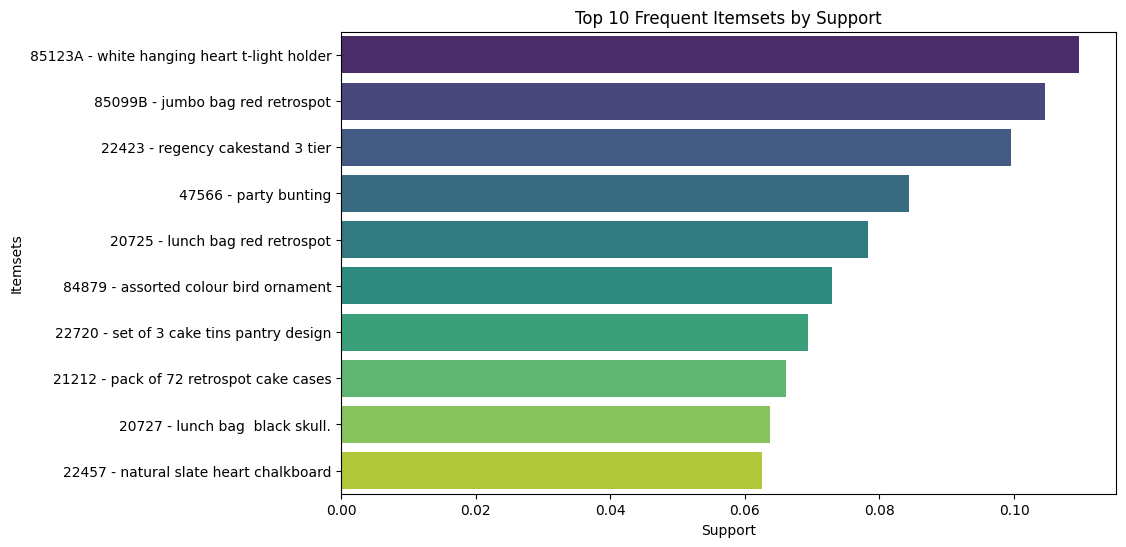

In [ ]:
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.01, use_colnames=True)

# Sort frequent itemsets by support in descending order
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False).copy() # Use .copy() to avoid SettingWithCopyWarning

# Convert frozensets to strings and remove parentheses for better display
frequent_itemsets_sorted['itemsets'] = frequent_itemsets_sorted['itemsets'].apply(
    lambda x: ', '.join(list(x))
)


print("Top 10 Frequent Itemsets:")
display(frequent_itemsets_sorted.head(10))

# Display the shape of the frequent itemsets DataFrame
print("\nShape of frequent itemsets DataFrame:", frequent_itemsets.shape)


# Optional: Visualize the top 10 frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_sorted.head(10), palette='viridis')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

## T·∫°o lu·∫≠t k·∫øt h·ª£p

T·ª´ c√°c t·∫≠p m·ª•c ph·ªï bi·∫øn, t·∫°o ra c√°c lu·∫≠t k·∫øt h·ª£p d·ª±a tr√™n ng∆∞·ª°ng tin c·∫≠y (confidence) ƒë√£ ch·ªçn.


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules from the frequent itemsets
# Use original_frequent_itemsets which was saved with the correct format
# Set the metric to 'lift' and the minimum threshold to 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by lift in descending order to see potentially interesting relationships
rules_by_lift = rules.sort_values(by='lift', ascending=False)

# Display the first 10 rows of the rules DataFrame with specified columns
print("Association Rules (sorted by Lift):")
display(rules_by_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))

# Display the shape of the rules DataFrame
print("\nShape of rules DataFrame:", rules.shape)

Association Rules (sorted by Lift):


antecedents  \
1513                        (22916 - herb marker thyme)   
1512  (22917 - herb marker rosemary, 22918 - herb ma...   
1514                     (22917 - herb marker rosemary)   
1511  (22916 - herb marker thyme, 22918 - herb marke...   
1520                     (22917 - herb marker rosemary)   
1517  (22920 - herb marker basil, 22916 - herb marke...   
1516  (22920 - herb marker basil, 22917 - herb marke...   
1521                        (22916 - herb marker thyme)   
1502                        (22916 - herb marker thyme)   
1503                     (22917 - herb marker rosemary)   
1510  (22916 - herb marker thyme, 22917 - herb marke...   
1515                      (22918 - herb marker parsley)   
1505                      (22918 - herb marker parsley)   
1504                        (22916 - herb marker thyme)   
1496                     (22917 - herb marker rosemary)   
1497                      (22918 - herb marker parsley)   
1519                        (22920 - herb marker basil)   
1518  (22916 - herb marker thyme, 22917 - herb marke...   
1498                         (22919 - herb marker mint)   
1499                      (22918 - herb marker parsley)   

                                            consequents   support  confidence  \
1513  (22917 - herb marker rosemary, 22918 - herb ma...  0.010171    0.856540   
1512                        (22916 - herb marker thyme)  0.010171    0.944186   
1514  (22916 - herb marker thyme, 22918 - herb marke...  0.010171    0.845833   
1511                     (22917 - herb marker rosemary)  0.010171    0.953052   
1520  (22920 - herb marker basil, 22916 - herb marke...  0.010021    0.833333   
1517                     (22917 - herb marker rosemary)  0.010021    0.952381   
1516                        (22916 - herb marker thyme)  0.010021    0.934579   
1521  (22920 - herb marker basil, 22917 - herb marke...  0.010021    0.843882   
1502                     (22917 - herb marker rosemary)  0.011073    0.932489   
1503                        (22916 - herb marker thyme)  0.011073    0.920833   
1510                      (22918 - herb marker parsley)  0.010171    0.918552   
1515  (22916 - herb marker thyme, 22917 - herb marke...  0.010171    0.852941   
1505                        (22916 - herb marker thyme)  0.010672    0.894958   
1504                      (22918 - herb marker parsley)  0.010672    0.898734   
1496                      (22918 - herb marker parsley)  0.010772    0.895833   
1497                     (22917 - herb marker rosemary)  0.010772    0.903361   
1519  (22916 - herb marker thyme, 22917 - herb marke...  0.010021    0.826446   
1518                        (22920 - herb marker basil)  0.010021    0.904977   
1498                      (22918 - herb marker parsley)  0.010622    0.883333   
1499                         (22919 - herb marker mint)  0.010622    0.890756   

           lift  
1513  79.514807  
1512  79.514807  
1514  79.258157  
1511  79.258157  
1520  79.202381  
1517  79.202381  
1516  78.705785  
1521  78.705785  
1502  77.548154  
1503  77.548154  
1510  77.031009  
1515  77.031009  
1505  75.369056  
1504  75.369056  
1496  75.125788  
1497  75.125788  
1519  74.638196  
1518  74.638196  
1498  74.077521  
1499  74.077521


Shape of rules DataFrame: (3296, 14)


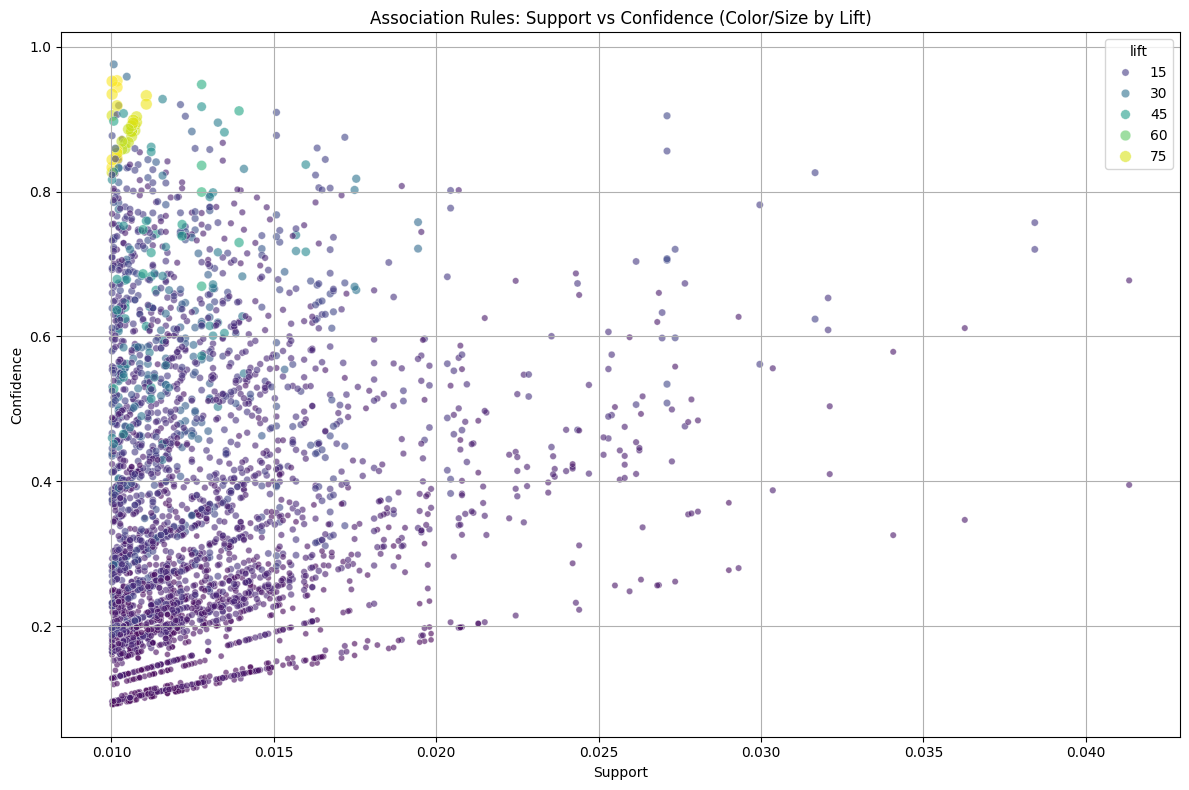

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rules for visualization (e.g., lift > 1) - adjust threshold as needed
rules_filtered_lift = rules[rules['lift'] > 1].copy() # Use a copy to avoid SettingWithCopyWarning

# Create a scatter plot of support vs confidence, with color representing lift
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules_filtered_lift, alpha=0.6, palette='viridis')
plt.title('Association Rules: Support vs Confidence (Color/Size by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)

# Add a legend for the size (optional, can be tricky with continuous size)
# handles, labels = scatterplot.get_legend_handles_labels()
# plt.legend(handles=handles, labels=labels, title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

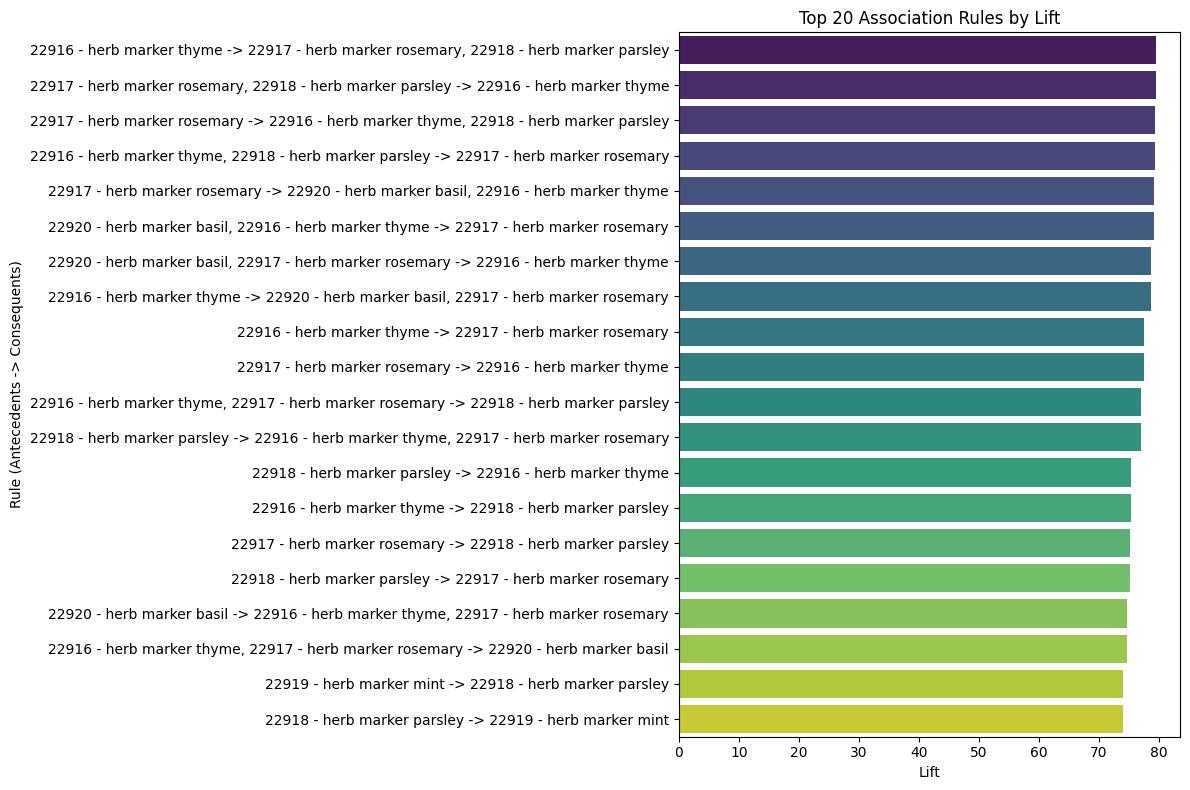

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort rules by lift and select the top N (e.g., top 20 rules with lift > 1)
top_rules_lift = rules[rules['lift'] > 1].sort_values(by='lift', ascending=False).head(20).copy() # Use a copy to avoid SettingWithCopyWarning

# Create a string representation for each rule for plotting
top_rules_lift['Rule'] = top_rules_lift['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + \
                         top_rules_lift['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a bar plot of the top rules by lift
plt.figure(figsize=(12, 8))
sns.barplot(x='lift', y='Rule', data=top_rules_lift, palette='viridis')
plt.title('Top 20 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule (Antecedents -> Consequents)')
plt.tight_layout()
plt.show()

## L·ªçc v√† di·ªÖn gi·∫£i lu·∫≠t

th√¨ sau khi c√≥ c√°c s·∫£n ph·∫©m c√≥ support cao th√¨ ch√∫ng ta s·∫Ω n√¢ng cao b·∫±ng c√°c chi·∫øn l∆∞·ª£t kinh doanh sau:
- c√≥ th·ªÉ ƒë·∫∑t ·ªü nh·ªØng k·ªá h√†ng d·ªÖ th·∫•y, c√≤n tr√™n web th√¨ ƒë·ªÉ ·ªü trang ch·ªß.
- C√≥ th·ªÉ g·ª£i √Ω V√≠ d·ª•, khi m·ªôt ng∆∞·ªùi mua jumbo bag red retrospot, h√£y g·ª£i √Ω lunch bag red retrospot ho·∫∑c regency cakestand 3 tier v√¨ ch√∫ng c≈©ng l√† nh·ªØng s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t.
- TƒÉng v√† ƒë·∫£m b·∫£o h√†ng trong kho.

C√≤n ƒë·ªëi v·ªõi lu·∫≠t k·∫øt h∆°p th√¨:
- T·∫°o c√°c g√≥i combo nh∆∞ "B·ªô S∆∞u T·∫≠p Th·∫£o M·ªôc Nh√† B·∫øp" bao g·ªìm herb marker thyme, herb marker parsley, v√† herb marker rosemary. B√°n g√≥i n√†y v·ªõi gi√° ∆∞u ƒë√£i h∆°n khi mua t·ª´ng s·∫£n ph·∫©m ri√™ng l·∫ª.

-Khi kh√°ch h√†ng th√™m m·ªôt s·∫£n ph·∫©m "herb marker" v√†o gi·ªè h√†ng, h·ªá th·ªëng ph·∫£i t·ª± ƒë·ªông hi·ªÉn th·ªã g·ª£i √Ω m·∫°nh m·∫Ω c√°c s·∫£n ph·∫©m li√™n quan. S·ª≠ d·ª•ng c√°c lu·∫≠t ƒë√£ t√¨m ƒë∆∞·ª£c, v√≠ d·ª•: "N·∫øu b·∫°n th√≠ch herb marker parsley, b·∫°n ch·∫Øc ch·∫Øn s·∫Ω th√≠ch herb marker thyme."

- V√≠ d·ª•: "Mua 3 s·∫£n ph·∫©m herb marker, t·∫∑ng 1 s·∫£n ph·∫©m kh√°c" ho·∫∑c "Gi·∫£m 20% khi mua tr·ªçn b·ªô". M·ªëi li√™n k·∫øt mua s·∫Øm r·∫•t m·∫°nh m·∫Ω c·ªßa c√°c s·∫£n ph·∫©m n√†y s·∫Ω ƒë·∫£m b·∫£o t·ª∑ l·ªá chuy·ªÉn ƒë·ªïi cao.

# ∆Ø·ªõc t√≠nh gi√° tr·ªã v√≤ng ƒë·ªùi kh√°ch h√†ng (CLV)

In [ ]:
!pip install lifetimes

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 584.2/584.2 kB 8.5 MB/s eta 0:00:00


In [ ]:
# CLEANED & COMPACT CLV PIPELINE (BG/NBD + Gamma-Gamma)
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import summary_data_from_transaction_data

# --- 0. Copy & filter customers (avoid modifying original df) ---
df_clean = df.copy()
df_clean = df_clean[df_clean['CustomerID'].notna()]
df_clean = df_clean[df_clean['CustomerID'] != 0]

# Ensure InvoiceDate datetime and create Amount if missing
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
if 'Amount' not in df_clean.columns:
    df_clean['Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# --- 1. Split historical / prediction by time (6 months cutoff) ---
latest_date = df_clean['InvoiceDate'].max()
cutoff_date = latest_date - timedelta(days=6*30)  # approx 6 months

df_historical = df_clean[df_clean['InvoiceDate'] <= cutoff_date].copy()
df_prediction = df_clean[df_clean['InvoiceDate'] > cutoff_date].copy()

print("Historical / Prediction shapes:", df_historical.shape, df_prediction.shape)
display(df_historical.head())
display(df_prediction.head())

Historical / Prediction shapes: (155862, 12) (242022, 12)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Day  Hour  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    1     8   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    1     8   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    1     8   

   Month  Amount  
0     12   15.30  
1     12   20.34  
2     12   22.00  
3     12   20.34  
4     12   20.34

InvoiceNo StockCode                        Description  Quantity  \
223317    556480     21034       rex cash+carry jumbo shopper         1   
223318    556480     82482  wooden picture frame white finish         3   
223319    556480     22798   antique glass dressing table pot         4   
223320    556480     23321        small white heart of wicker         4   
223321    556480     85107   cut glass t-light holder octagon         1   

               InvoiceDate  UnitPrice  CustomerID         Country  Day  Hour  \
223317 2011-06-12 12:55:00       0.95     13617.0  United Kingdom   12    12   
223318 2011-06-12 12:55:00       2.55     13617.0  United Kingdom   12    12   
223319 2011-06-12 12:55:00       2.95     13617.0  United Kingdom   12    12   
223320 2011-06-12 12:55:00       1.69     13617.0  United Kingdom   12    12   
223321 2011-06-12 12:55:00       2.55     13617.0  United Kingdom   12    12   

        Month  Amount  
223317      6    0.95  
223318      6    7.65  
223319      6   11.80  
223320      6    6.76  
223321      6    2.55

In [ ]:
historical_customers = df_historical['CustomerID'].nunique()
print("S·ªë kh√°ch h√†ng trong historical:", historical_customers)

# ƒê·∫øm s·ªë l∆∞·ª£ng kh√°ch h√†ng duy nh·∫•t trong t·∫≠p prediction
prediction_customers = df_prediction['CustomerID'].nunique()
print("S·ªë kh√°ch h√†ng trong prediction:", prediction_customers)

S·ªë kh√°ch h√†ng trong historical: 2815
S·ªë kh√°ch h√†ng trong prediction: 3478


T·∫°o RFM m·ªõi cho CLV

In [ ]:

# --- 2. Build RFM (lifetimes format) on historical data ---
rfm_historical = summary_data_from_transaction_data(
    df_historical,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    monetary_value_col='Amount',
    observation_period_end=cutoff_date
)
# summary_data_from_transaction_data yields columns: frequency, recency, T, monetary_value

print("\nRFM (sample):")
display(rfm_historical.head())


RFM (sample):


frequency  recency      T  monetary_value
CustomerID                                           
12346.0           0.0      0.0  145.0        0.000000
12347.0           3.0    184.0  187.0      498.053333
12348.0           2.0    110.0  178.0      297.220000
12350.0           0.0      0.0  130.0        0.000000
12352.0           3.0     34.0  116.0      421.770000

In [ ]:
from lifetimes import BetaGeoFitter, GammaGammaFitter

# Fit BG/NBD
# Increased penalizer_coef to help with convergence
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(rfm_historical['frequency'], rfm_historical['recency'], rfm_historical['T'])

# Fit Gamma-Gamma (ch·ªâ frequency > 0)
# Keep penalizer_coef for Gamma-Gamma as it might help with stability
ggf = GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(
    rfm_historical[rfm_historical['frequency'] > 0]['frequency'],
    rfm_historical[rfm_historical['frequency'] > 0]['monetary_value']
)

print("Models fitted successfully.")

Models fitted successfully.


D·ª± ƒëo√°n CLV cho t·ª´ng kh√°ch h√†ng trong 6 th√°ng t·ªõi

In [ ]:
# D·ª± ƒëo√°n s·ªë l·∫ßn mua l·∫°i trong 6 th√°ng (‚âà180 ng√†y)
rfm_historical['pred_purchases_6m'] = bgf.predict(
    180,
    rfm_historical['frequency'],
    rfm_historical['recency'],
    rfm_historical['T']
)

# D·ª± ƒëo√°n gi√° tr·ªã trung b√¨nh m·ªói ƒë∆°n h√†ng
rfm_historical['pred_avg_order_value'] = ggf.conditional_expected_average_profit(
    rfm_historical['frequency'],
    rfm_historical['monetary_value']
)

# D·ª± ƒëo√°n CLV = s·ªë l·∫ßn mua √ó gi√° tr·ªã trung b√¨nh
rfm_historical['predicted_clv_6m'] = (
    rfm_historical['pred_purchases_6m'] *
    rfm_historical['pred_avg_order_value']
)


In [ ]:
# T·ªïng chi ti√™u th·∫≠t c·ªßa kh√°ch trong 6 th√°ng prediction
actual_clv = (
    df_prediction.groupby('CustomerID')['Amount']
    .sum()
    .reset_index()
    .rename(columns={'Amount': 'actual_clv_6m'})
)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Merge d·ª± ƒëo√°n v√† th·ª±c t·∫ø
clv_compare = rfm_historical.reset_index()[['CustomerID','predicted_clv_6m']].merge(
    actual_clv, on='CustomerID', how='left'
).fillna(0)

# T√≠nh RMSE, R¬≤
# Remove squared=False as it's not supported in this scikit-learn version
rmse = np.sqrt(mean_squared_error(clv_compare['actual_clv_6m'], clv_compare['predicted_clv_6m']))
r2 = r2_score(clv_compare['actual_clv_6m'], clv_compare['predicted_clv_6m'])

print(f"ƒê√°nh gi√° m√¥ h√¨nh CLV ‚Üí RMSE: {rmse:.2f}, R¬≤: {r2:.2f}")
display(clv_compare.head())

ƒê√°nh gi√° m√¥ h√¨nh CLV ‚Üí RMSE: 5134.32, R¬≤: 0.50


CustomerID  predicted_clv_6m  actual_clv_6m
0     12346.0       -487.813753           0.00
1     12347.0       1389.408148        2104.05
2     12348.0        625.173524         310.00
3     12350.0       -530.427059           0.00
4     12352.0       1708.672098         944.23

In [ ]:
# --- Ph√¢n nh√≥m CLV ---
clv_compare['clv_segment'] = pd.qcut(
    clv_compare['predicted_clv_6m'],
    q=3,
    labels=['Th·∫•p', 'Trung b√¨nh', 'Cao']
)

# Xu·∫•t b·∫£ng k·∫øt qu·∫£
clv_table = clv_compare[['CustomerID','predicted_clv_6m','clv_segment']]
print("\nB·∫£ng ph√¢n nh√≥m CLV:")
display(clv_table.head(10))



B·∫£ng ph√¢n nh√≥m CLV:


CustomerID  predicted_clv_6m clv_segment
0     12346.0       -487.813753        Th·∫•p
1     12347.0       1389.408148         Cao
2     12348.0        625.173524         Cao
3     12350.0       -530.427059        Th·∫•p
4     12352.0       1708.672098         Cao
5     12353.0          0.000000  Trung b√¨nh
6     12354.0       -971.922397        Th·∫•p
7     12355.0          0.000000  Trung b√¨nh
8     12356.0        723.149418         Cao
9     12359.0       3481.061706         Cao

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming clv_compare DataFrame with 'actual_clv_6m', 'predicted_clv_6m', and 'clv_segment' exists

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    clv_compare,
    x='actual_clv_6m',
    y='predicted_clv_6m',
    z='predicted_clv_6m', # You can use another dimension if available, or repeat predicted for a "flat" 3D look
    color='clv_segment',
    title='Predicted vs Actual CLV (6 months) by CLV Segment (3D)',
    labels={'actual_clv_6m': 'Actual CLV', 'predicted_clv_6m': 'Predicted CLV'},
    hover_data=['CustomerID'] # Add CustomerID to hover information
)

# Update layout for better viewing angles if needed
fig.update_layout(scene = dict(
                    xaxis_title='Actual CLV',
                    yaxis_title='Predicted CLV',
                    zaxis_title='Predicted CLV'), # Adjust z-axis title if using a different variable
                  margin=dict(l=0, r=0, b=0, t=40))


fig.show()

In [ ]:
# --- 0. Data Preparation nh∆∞ c≈© ---
df_ml = df[df['CustomerID'] != 0].copy()
df_ml['InvoiceDate'] = pd.to_datetime(df_ml['InvoiceDate'])
if 'Amount' not in df_ml.columns:
    df_ml['Amount'] = df_ml['Quantity'] * df_ml['UnitPrice']

# Thay v√¨ 6 th√°ng, ta ch·ªçn cutoff c·ªë ƒë·ªãnh, v√≠ d·ª• train t·ªõi 2011-06-30
cutoff_date = pd.Timestamp('2011-06-30')

df_train = df_ml[df_ml['InvoiceDate'] <= cutoff_date].copy()
df_test  = df_ml[df_ml['InvoiceDate'] >  cutoff_date].copy()

# Th·ª±c t·∫ø CLV c·ªßa giai ƒëo·∫°n test: 6 th√°ng sau cutoff
actual_clv_test = (
    df_test.groupby('CustomerID')['Amount']
    .sum()
    .reset_index()
    .rename(columns={'Amount': 'actual_clv_6m'})
)


# H·ªá th·ªëng g·ª£i √Ω (item-item ho·∫∑c user-item)

G·ªôp d·ªØ li·ªáu: m·ªói d√≤ng l√† m·ªôt s·∫£n ph·∫©m ƒë∆∞·ª£c mua b·ªüi kh√°ch h√†ng.

T·∫°o matrix kh√°ch h√†ng‚Äìs·∫£n ph·∫©m: h√†ng = CustomerID, c·ªôt = StockCode, gi√° tr·ªã = s·ªë l·∫ßn mua ho·∫∑c 1/0 (n·∫øu ch·ªâ quan t√¢m ƒë√£ mua hay ch∆∞a).

In [ ]:
# Create a DataFrame with CustomerID, StockCode, and Quantity
# We will use the original DataFrame 'df' which has already been cleaned
df_recommender = df[['CustomerID', 'StockCode', 'Quantity']].copy()

# Ensure CustomerID is not 0 as we are creating a customer-product matrix
df_recommender = df_recommender[df_recommender['CustomerID'] != 0]

# S·ªë l∆∞·ª£ng kh√°ch h√†ng duy nh·∫•t
num_customers = df_recommender['CustomerID'].nunique()
print("S·ªë l∆∞·ª£ng kh√°ch h√†ng duy nh·∫•t:", num_customers)

S·ªë l∆∞·ª£ng kh√°ch h√†ng duy nh·∫•t: 4338


In [ ]:


# Create a customer-product matrix with the number of purchases
customer_product_matrix_count = df_recommender.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum', # Sum quantity for each customer-product pair
    fill_value=0
) # Added the missing closing parenthesis here

# Create a customer-product matrix with a binary indicator (1 if purchased, 0 otherwise)
customer_product_matrix_binary = customer_product_matrix_count.applymap(lambda x: 1 if x > 0 else 0)


print("Customer-Product Matrix (Purchase Count):")
display(customer_product_matrix_count.head())
print("\nShape of Purchase Count Matrix:", customer_product_matrix_count.shape)


print("\nCustomer-Product Matrix (Binary - Purchased or Not):")
display(customer_product_matrix_binary.head())
print("\nShape of Binary Purchase Matrix:", customer_product_matrix_binary.shape)

Customer-Product Matrix (Purchase Count):


StockCode   10002  10080  10120  10125  10133  10135  11001  15030  15034  \
CustomerID                                                                  
12346.0         0      0      0      0      0      0      0      0      0   
12347.0         0      0      0      0      0      0      0      0      0   
12348.0         0      0      0      0      0      0      0      0      0   
12349.0         0      0      0      0      0      0      0      0      0   
12350.0         0      0      0      0      0      0      0      0      0   

StockCode   15036  ...  90214V  90214W  90214Y  90214Z  BANK CHARGES  C2  DOT  \
CustomerID         ...                                                          
12346.0         0  ...       0       0       0       0             0   0    0   
12347.0         0  ...       0       0       0       0             0   0    0   
12348.0         0  ...       0       0       0       0             0   0    0   
12349.0         0  ...       0       0       0       0             0   0    0   
12350.0         0  ...       0       0       0       0             0   0    0   

StockCode   M  PADS  POST  
CustomerID                 
12346.0     0     0     0  
12347.0     0     0     0  
12348.0     0     0     9  
12349.0     0     0     1  
12350.0     0     0     1  

[5 rows x 3665 columns]


Shape of Purchase Count Matrix: (4338, 3665)

Customer-Product Matrix (Binary - Purchased or Not):


StockCode   10002  10080  10120  10125  10133  10135  11001  15030  15034  \
CustomerID                                                                  
12346.0         0      0      0      0      0      0      0      0      0   
12347.0         0      0      0      0      0      0      0      0      0   
12348.0         0      0      0      0      0      0      0      0      0   
12349.0         0      0      0      0      0      0      0      0      0   
12350.0         0      0      0      0      0      0      0      0      0   

StockCode   15036  ...  90214V  90214W  90214Y  90214Z  BANK CHARGES  C2  DOT  \
CustomerID         ...                                                          
12346.0         0  ...       0       0       0       0             0   0    0   
12347.0         0  ...       0       0       0       0             0   0    0   
12348.0         0  ...       0       0       0       0             0   0    0   
12349.0         0  ...       0       0       0       0             0   0    0   
12350.0         0  ...       0       0       0       0             0   0    0   

StockCode   M  PADS  POST  
CustomerID                 
12346.0     0     0     0  
12347.0     0     0     0  
12348.0     0     0     1  
12349.0     0     0     1  
12350.0     0     0     1  

[5 rows x 3665 columns]


Shape of Binary Purchase Matrix: (4338, 3665)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Calculate item similarity using cosine similarity on the transposed binary matrix
# Transpose the matrix to have items as rows and customers as columns
item_similarity_matrix = cosine_similarity(customer_product_matrix_binary.T)

# Convert the similarity matrix to a DataFrame for easier handling
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=customer_product_matrix_binary.columns, columns=customer_product_matrix_binary.columns)

print("Item Similarity Matrix (first 5x5):")
display(item_similarity_df.head())

Item Similarity Matrix (first 5x5):


StockCode     10002     10080     10120     10125     10133     10135  \
StockCode                                                               
10002      1.000000  0.000000  0.094868  0.090351  0.062932  0.098907   
10080      0.000000  1.000000  0.000000  0.032774  0.045655  0.047836   
10120      0.094868  0.000000  1.000000  0.057143  0.059702  0.041703   
10125      0.090351  0.032774  0.057143  1.000000  0.042644  0.044682   
10133      0.062932  0.045655  0.059702  0.042644  1.000000  0.280097   

StockCode     11001     15030     15034     15036  ...  90214V  90214W  \
StockCode                                          ...                   
10002      0.095346  0.047673  0.075593  0.090815  ...     0.0     0.0   
10080      0.000000  0.000000  0.082261  0.049413  ...     0.0     0.0   
10120      0.060302  0.060302  0.095618  0.028718  ...     0.0     0.0   
10125      0.043073  0.000000  0.051224  0.030770  ...     0.0     0.0   
10133      0.045002  0.060003  0.071358  0.057152  ...     0.0     0.0   

StockCode  90214Y  90214Z  BANK CHARGES        C2  DOT         M  PADS  \
StockCode                                                                
10002         0.0     0.0           0.0  0.029361  0.0  0.067591   0.0   
10080         0.0     0.0           0.0  0.000000  0.0  0.016345   0.0   
10120         0.0     0.0           0.0  0.000000  0.0  0.071247   0.0   
10125         0.0     0.0           0.0  0.000000  0.0  0.071247   0.0   
10133         0.0     0.0           0.0  0.036955  0.0  0.070893   0.0   

StockCode      POST  
StockCode            
10002      0.078217  
10080      0.000000  
10120      0.010993  
10125      0.070669  
10133      0.021877  

[5 rows x 3665 columns]

In [ ]:
# T·∫°o b·∫£ng √°nh x·∫° StockCode -> Description
stockcode_to_desc = df.drop_duplicates('StockCode').set_index('StockCode')['Description']

def recommend_items_for_user(customer_id, customer_product_matrix_binary, item_similarity_df, k=10):
    """
    Generates item recommendations for a customer based on their purchase history and item similarity.

    Args:
        customer_id: The ID of the customer.
        customer_product_matrix_binary (pd.DataFrame): The customer-product binary matrix.
        item_similarity_df (pd.DataFrame): The item similarity matrix.
        k (int): The number of recommendations to generate.

    Returns:
        tuple: (recommendations_df, purchased_list)
    """
    if customer_id not in customer_product_matrix_binary.index:
        print(f"Customer ID '{customer_id}' not found in the customer-product matrix.")
        return None, None

    # L·∫•y vector l·ªãch s·ª≠ mua c·ªßa kh√°ch
    user_vector = customer_product_matrix_binary.loc[customer_id]

    # T√≠nh ƒëi·ªÉm g·ª£i √Ω
    item_scores = item_similarity_df.dot(user_vector)

    # L·∫•y danh s√°ch s·∫£n ph·∫©m ƒë√£ mua
    purchased_items = user_vector[user_vector > 0].index
    purchased_list = [(code, stockcode_to_desc.get(code, "Unknown")) for code in purchased_items]

    # Lo·∫°i b·ªè s·∫£n ph·∫©m ƒë√£ mua kh·ªèi g·ª£i √Ω
    item_scores = item_scores.drop(purchased_items)

    # L·∫•y top-k g·ª£i √Ω
    recommendations = item_scores.sort_values(ascending=False).head(k)

    # ƒê∆∞a v·ªÅ DataFrame k√®m Description
    recommendations_df = recommendations.to_frame(name="Score").reset_index()
    recommendations_df["Description"] = recommendations_df["StockCode"].map(stockcode_to_desc)

    return recommendations_df, purchased_list


# Example usage
example_customer_id = customer_product_matrix_binary.index[4]
print(f"Recommendations for Customer ID '{example_customer_id}':")
recommendations, purchased_list = recommend_items_for_user(example_customer_id, customer_product_matrix_binary, item_similarity_df)

print("\nüìå Danh s√°ch s·∫£n ph·∫©m ƒë√£ mua:")
for code, desc in purchased_list:
    print(f"- {code}: {desc}")

print("\nüìå G·ª£i √Ω s·∫£n ph·∫©m:")
display(recommendations)


Recommendations for Customer ID '12350.0':

üìå Danh s√°ch s·∫£n ph·∫©m ƒë√£ mua:
- 20615: blue polkadot passport cover
- 20652: blue polkadot luggage tag
- 21171: bathroom metal sign
- 21832: chocolate calculator
- 21864: union jack flag passport cover
- 21866: union jack flag luggage tag
- 21908: chocolate this way metal sign
- 21915: red  harmonica in box
- 22348: tea bag plate red retrospot
- 22412: metal sign neighbourhood witch
- 22551: plasters in tin spaceboy
- 22557: plasters in tin vintage paisley
- 22620: 4 traditional spinning tops
- 79066K: retro mod tray
- 79191C: retro plastic elephant tray
- 84086C: pink/purple retro radio
- POST: postage

üìå G·ª£i √Ω s·∫£n ph·∫©m:


StockCode     Score                       Description
0      22554  3.077102  plasters in tin woodland animals
1      22556  2.821355     plasters in tin circus parade
2      22555  2.779795         plasters in tin strongman
3      22553  2.632807            plasters in tin skulls
4      21914  2.541887             blue harmonica in box
5      20725  2.524668           lunch bag red retrospot
6      21165  2.498307      beware of the cat metal sign
7      22382  2.460049         lunch bag spaceboy design
8      21172  2.458502                  party metal sign
9      21212  2.416571   pack of 72 retrospot cake cases

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# ======================================
# 1. Chu·∫©n b·ªã d·ªØ li·ªáu
# ======================================
df_model = df[['CustomerID', 'StockCode', 'InvoiceDate', 'Quantity']].copy()

# Gom s·ªë l∆∞·ª£ng mua cho m·ªói kh√°ch-s·∫£n ph·∫©m
customer_product = df_model.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()

# Chia train/test (holdout)
train, test = train_test_split(customer_product, test_size=0.2, random_state=42)

# T·∫°o ma tr·∫≠n user-item (binary ƒë·ªÉ ƒë√°nh gi√° d·ªÖ h∆°n)
train_matrix = train.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
test_matrix = test.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# T·∫°o b·∫£ng √°nh x·∫° StockCode -> Description (reuse from previous cell)
stockcode_to_desc = df.drop_duplicates('StockCode').set_index('StockCode')['Description']


# ======================================
# 2. C√°c h√†m ƒë√°nh gi√°
# ======================================
def precision_recall_at_k(recommendations, test_matrix, k=10):
    precisions, recalls = [], []
    for user in recommendations:
        if user not in test_matrix.index:
            continue
        true_items = set(test_matrix.loc[user][test_matrix.loc[user] > 0].index)
        if not true_items:
            continue
        rec_items = set([item for item, _ in recommendations[user][:k]])
        n_hit = len(true_items & rec_items)
        precisions.append(n_hit / k)
        recalls.append(n_hit / len(true_items))
    return np.mean(precisions), np.mean(recalls)

# ======================================
# 3. Baseline ‚Äì g·ª£i √Ω theo s·∫£n ph·∫©m ph·ªï bi·∫øn
# ======================================
popular_items = train.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

baseline_recommendations = defaultdict(list)
for user in train_matrix.index:
    baseline_recommendations[user] = [(item, 1.0) for item in popular_items.index]

p_baseline, r_baseline = precision_recall_at_k(baseline_recommendations, test_matrix, k=10)

# ======================================
# 4. Item-based CF ‚Äì cosine similarity g·ª£i √Ω theo h√†nh vi c·ªßa kh√°ch h√†ng
# ======================================
item_sim = cosine_similarity(train_matrix.T)
item_sim_df = pd.DataFrame(item_sim, index=train_matrix.columns, columns=train_matrix.columns)

cf_recommendations = defaultdict(list)
for user in train_matrix.index:
    user_vector = train_matrix.loc[user]
    purchased = user_vector[user_vector > 0].index
    if len(purchased) == 0:
        continue
    scores = item_sim_df[purchased].sum(axis=1)
    scores = scores.drop(purchased, errors='ignore')
    top_items = scores.sort_values(ascending=False).head(10)
    cf_recommendations[user] = list(top_items.items())

p_cf, r_cf = precision_recall_at_k(cf_recommendations, test_matrix, k=10)

# ======================================
# 5. K·∫øt qu·∫£ ƒë√°nh gi√°
# ======================================
print("üìä Precision@10 / Recall@10")
print(f"Baseline: {p_baseline:.3f} / {r_baseline:.3f}")
print(f"CF      : {p_cf:.3f} / {r_cf:.3f}")

# ======================================
# 6. Top-10 s·∫£n ph·∫©m g·ª£i √Ω nhi·ªÅu nh·∫•t (with Description)
# ======================================
def get_top10_all_users_with_desc(recommendations, stockcode_to_desc):
    all_items = []
    for recs in recommendations.values():
        all_items.extend([i for i, _ in recs])
    top_10_stockcodes = pd.Series(all_items).value_counts().head(10)
    top_10_with_desc = pd.DataFrame({
        'StockCode': top_10_stockcodes.index,
        'Count': top_10_stockcodes.values
    })
    top_10_with_desc['Description'] = top_10_with_desc['StockCode'].map(stockcode_to_desc)
    return top_10_with_desc[['StockCode', 'Description', 'Count']]


print("\nüî• Top-10 s·∫£n ph·∫©m (Baseline):")
display(get_top10_all_users_with_desc(baseline_recommendations, stockcode_to_desc))

print("\nüî• Top-10 s·∫£n ph·∫©m (CF):")
display(get_top10_all_users_with_desc(cf_recommendations, stockcode_to_desc))

üìä Precision@10 / Recall@10
Baseline: 0.021 / 0.021
CF      : 0.018 / 0.025

üî• Top-10 s·∫£n ph·∫©m (Baseline):


StockCode                         Description  Count
0     23843         paper craft , little birdie   4311
1     23166      medium ceramic top storage jar   4311
2     22197                small popcorn holder   4311
3     84077   world war 2 gliders asstd designs   4311
4    85099B             jumbo bag red retrospot   4311
5     21212     pack of 72 retrospot cake cases   4311
6     84879       assorted colour bird ornament   4311
7    85123A  white hanging heart t-light holder   4311
8     22616           pack of 12 london tissues   4311
9     22492              mini paint set vintage   4311


üî• Top-10 s·∫£n ph·∫©m (CF):


StockCode                        Description  Count
0     22653                         button box   2324
1     22327  round snack boxes set of 4 skulls   1916
2     20719             woodland charlotte bag   1868
3     22819          birthday card, retro spot   1824
4     20723           strawberry charlotte bag   1739
5     20717             strawberry shopper bag   1666
6     22378                wall tidy retrospot   1520
7     22814                   card party games   1423
8     22355          charlotte bag suki design   1164
9     21935                 suki  shoulder bag    998

baseline l√† g·ª£i √Ω d·ª±a tr√™n 10 s·∫£n ph·∫©m ƒë∆∞·ª£c mua nhi·ªÅu nh·∫•t
c√≤n CF th√¨ s·∫Ω ph√¢n t√≠ch h√†nh vi t∆∞·ªùng t·ª± v√† g·ª£i m√≥n h√†ng m√† h·ªç ch∆∞a mua

Evaluation Metrics:


Baseline  Item-based CF
Metric                               
Precision@10  0.020575       0.017997
Recall@10     0.021202       0.025331

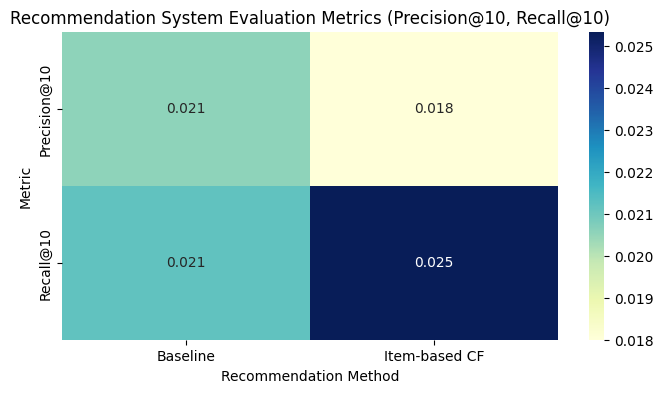

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming p_baseline, r_baseline, p_cf, r_cf are available from the previous evaluation cell

# Create a DataFrame for the heatmap
evaluation_data = {
    'Metric': ['Precision@10', 'Recall@10'],
    'Baseline': [p_baseline, r_baseline],
    'Item-based CF': [p_cf, r_cf]
}
evaluation_df = pd.DataFrame(evaluation_data).set_index('Metric')

print("Evaluation Metrics:")
display(evaluation_df)

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(evaluation_df, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Recommendation System Evaluation Metrics (Precision@10, Recall@10)')
plt.ylabel('Metric')
plt.xlabel('Recommendation Method')
plt.show()

 Nghƒ©a l√† trong 10 s·∫£n ph·∫©m ƒë∆∞·ª£c g·ª£i √Ω, t·ª∑ l·ªá s·∫£n ph·∫©m m√† ng∆∞·ªùi d√πng th·ª±c s·ª± mua (relevant items) kh√° th·∫•p (~2%), v√† baseline cao h∆°n CF m·ªôt ch√∫t.

 Nghƒ©a l√† trong to√†n b·ªô s·∫£n ph·∫©m m√† ng∆∞·ªùi d√πng th·ª±c s·ª± quan t√¢m, h·ªá th·ªëng g·ª£i √Ω ƒë√£ t√¨m ra ƒë∆∞·ª£c kho·∫£ng 2%, v√† CF b·∫Øt ƒë∆∞·ª£c nhi·ªÅu h∆°n baseline

Th·∫ø n√™n x√©t theo t√≠nh g·ª£i √Ω theo s·∫£n ph·∫©m c√≥ li√™n quan th√¨ d√πng CF

In [ ]:
# Ch·ªçn m·ªôt CustomerID ƒë·ªÉ g·ª£i √Ω
# Thay th·∫ø b·∫±ng CustomerID m√† b·∫°n mu·ªën
customer_id_to_recommend = 12590.0  # V√≠ d·ª•

# L·∫•y g·ª£i √Ω v√† danh s√°ch s·∫£n ph·∫©m ƒë√£ mua
recommendations_df, purchased_list = recommend_items_for_user(
    customer_id_to_recommend,
    customer_product_matrix_binary,
    item_similarity_df
)

if recommendations_df is not None:
    print(f"\nüìå Danh s√°ch s·∫£n ph·∫©m ƒë√£ mua c·ªßa Kh√°ch h√†ng {customer_id_to_recommend}:")
    if purchased_list:
        for code, desc in purchased_list:
            print(f"- {code}: {desc}")
    else:
        print("Kh√¥ng c√≥ d·ªØ li·ªáu l·ªãch s·ª≠ mua h√†ng.")

    print(f"\nüìå G·ª£i √Ω s·∫£n ph·∫©m cho Kh√°ch h√†ng {customer_id_to_recommend}:")
    if not recommendations_df.empty:
        display(recommendations_df)
    else:
        print("Kh√¥ng c√≥ g·ª£i √Ω n√†o ƒë∆∞·ª£c t·∫°o ra.")


üìå Danh s√°ch s·∫£n ph·∫©m ƒë√£ mua c·ªßa Kh√°ch h√†ng 12590.0:
- 15036: assorted colours silk fan
- 20679: edwardian parasol red
- 20685: doormat red retrospot
- 20719: woodland charlotte bag
- 20723: strawberry charlotte bag
- 20724: red retrospot charlotte bag
- 20725: lunch bag red retrospot
- 20726: lunch bag woodland
- 21035: set/2 red retrospot tea towels
- 21039: red retrospot shopping bag
- 21121: set/10 red polkadot party candles
- 21154: red retrospot oven glove
- 21155: red retrospot peg bag
- 21164: home sweet home metal sign
- 21165: beware of the cat metal sign
- 21523: doormat fancy font home sweet home
- 21559: strawberry lunch box with cutlery
- 21731: red toadstool led night light
- 21907: i'm on holiday metal sign
- 21936: red retrospot picnic bag
- 21937: strawberry   picnic bag
- 22179: set 10 lights night owl
- 22195: large heart measuring spoons
- 22243: 5 hook hanger red magic toadstool
- 22329: round container set of 5 retrospot
- 22352: lunch box with cutl

StockCode      Score                      Description
0     22382  14.565212        lunch bag spaceboy design
1     23206  13.935100           lunch bag apple design
2     20727  13.693169          lunch bag  black skull.
3     22383  13.586958           lunch bag suki  design
4     20728  13.581183              lunch bag cars blue
5     22384  13.579926          lunch bag pink polkadot
6    85099B  13.433835          jumbo bag red retrospot
7     23207  13.332536        lunch bag alphabet design
8     21212  13.250190  pack of 72 retrospot cake cases
9     23208  12.726520    lunch bag vintage leaf design

# D·ª± b√°o chu·ªói th·ªùi gian (doanh thu / nhu c·∫ßu theo lo·∫°i)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# G·ªôp theo ng√†y, ch·ªâ nh·ªØng ng√†y c√≥ b√°n
daily_revenue = (
    df.resample('D', on='InvoiceDate')['Amount']
      .sum()
      .loc[lambda x: x > 0]      # l·ªçc doanh thu > 0
)

print(daily_revenue.head())

# G·ªôp theo th√°ng, ch·ªâ th√°ng c√≥ b√°n
monthly_revenue = (
    df.resample('M', on='InvoiceDate')['Amount']
      .sum()
      .loc[lambda x: x > 0]
)

print(monthly_revenue.head())


InvoiceDate
2010-12-01    58960.79
2010-12-02    47748.38
2010-12-03    46943.71
2010-12-05    31774.95
2010-12-06    54830.46
Name: Amount, dtype: float64
InvoiceDate
2010-12-31    823746.140
2011-01-31    691364.560
2011-02-28    523631.890
2011-03-31    717639.360
2011-04-30    537808.621
Freq: ME, Name: Amount, dtype: float64


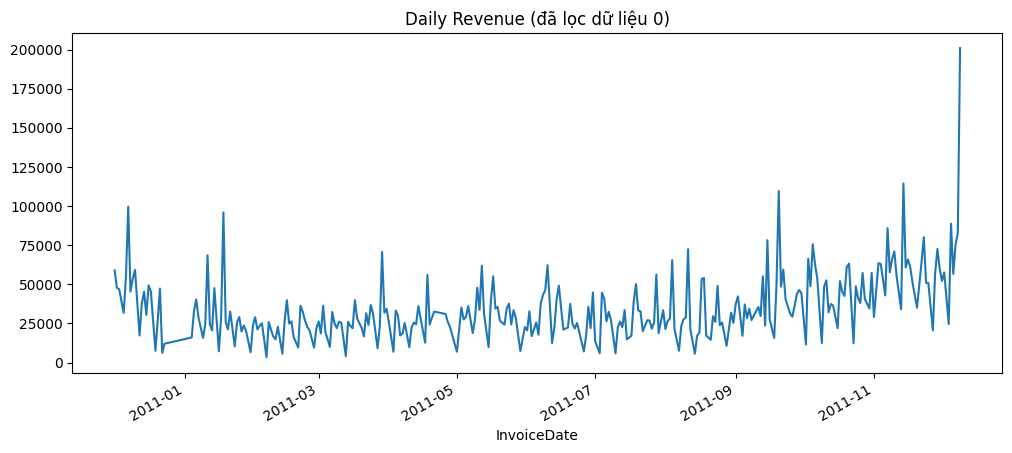

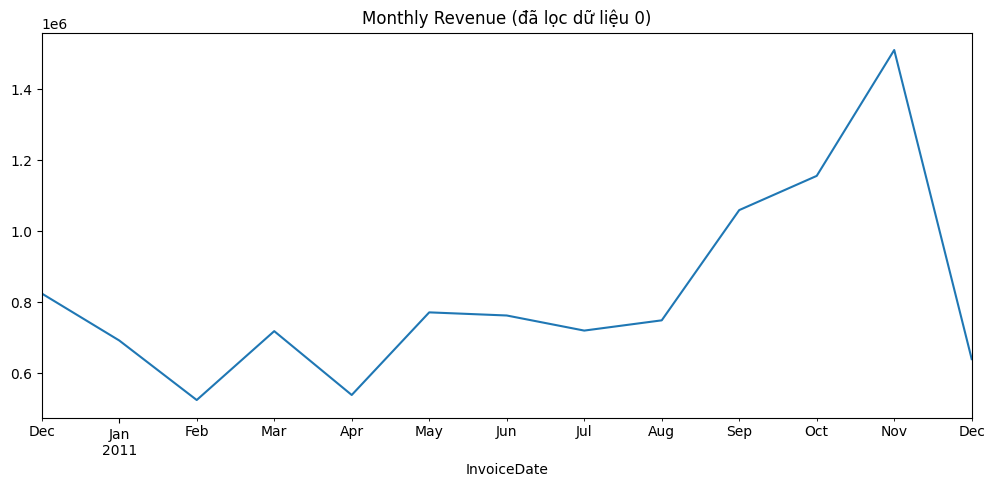

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1Ô∏è‚É£  B·ªè c√°c d√≤ng Quantity = 0 ho·∫∑c UnitPrice = 0
df_clean = df[(df['Quantity'] != 0) & (df['UnitPrice'] != 0)].copy()

# 2Ô∏è‚É£  T·∫°o c·ªôt Amount
df_clean['Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 3Ô∏è‚É£  Doanh thu theo ng√†y
daily_revenue = (
    df_clean.resample('D', on='InvoiceDate')['Amount']
             .sum()
             .loc[lambda x: x > 0]      # l·ªçc doanh thu > 0
)

# 4Ô∏è‚É£  Doanh thu theo th√°ng
monthly_revenue = (
    df_clean.resample('M', on='InvoiceDate')['Amount']
             .sum()
             .loc[lambda x: x > 0]
)

# 5Ô∏è‚É£  V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12,5))
daily_revenue.plot(title='Daily Revenue (ƒë√£ l·ªçc d·ªØ li·ªáu 0)')
plt.show()

plt.figure(figsize=(12,5))
monthly_revenue.plot(title='Monthly Revenue (ƒë√£ l·ªçc d·ªØ li·ªáu 0)')
plt.show()

Kiem tra tinh dung

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(daily_revenue)
print("ADF p-value:", adf_result[1])


ADF p-value: 0.9616817472846348


th√¨ theo p-value  th√¨ n√≥ l∆°n h∆°n 0.05 n√™n cho r·∫±ng kh√¥ng c√≥ t√≠nh d·ª´ng nghƒ©a l√† d·ªØ li·ªáu thay ƒë·ªïi v√† bi·∫øn ƒë·ªông l√™n xu·ªëng

In [ ]:
train_size = int(len(daily_revenue) * 0.8)
train, test = daily_revenue[:train_size], daily_revenue[train_size:]


D·ª±a v√†o hai bi·ªÉu ƒë·ªì  ƒë·ªì th·ªã T·ª± t∆∞∆°ng quan (Autocorrelation - ACF) v√† T·ª± t∆∞∆°ng quan ri√™ng ph·∫ßn (Partial Autocorrelation - PACF), ƒë∆∞·ª£c d√πng ƒë·ªÉ x√°c ƒë·ªãnh c√°c tham s·ªë cho m√¥ h√¨nh d·ª± ƒëo√°n chu·ªói th·ªùi gian nh∆∞ ARIMA.

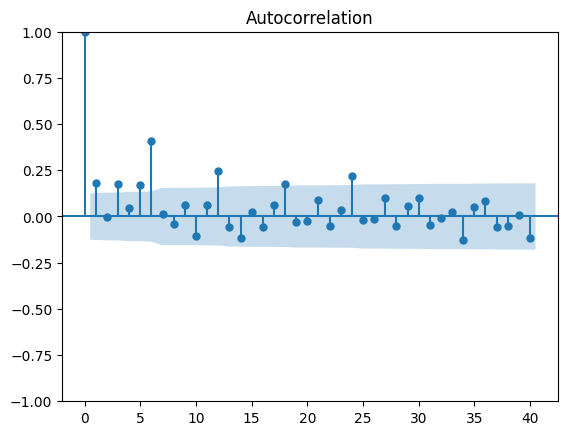

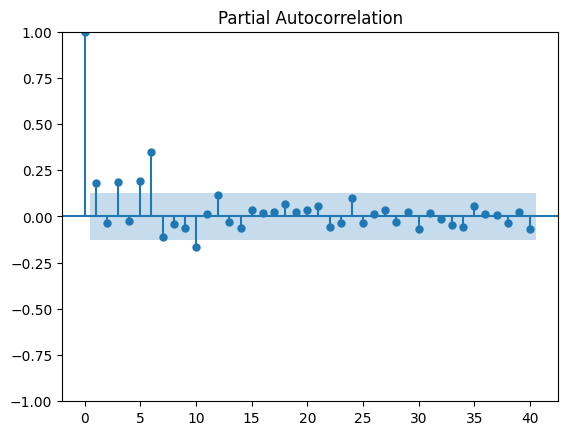

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train, lags=40)
plot_pacf(train, lags=40)
plt.show()


D√πng ARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Explicitly set the frequency of the daily_revenue Series
train = train.asfreq('D')

model = SARIMAX(
    train,
    order=(1,1,1),          # p,d,q
    seasonal_order=(1,1,1,7) # P,D,Q,s v·ªõi s=7 cho tu·∫ßn
)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

In [ ]:

# ----- G·ªôp Actual & Predict -----
result_df = pd.DataFrame({
    "Actual": test,
    "Predicted": forecast
})
print(result_df.head(15))
# T√≠nh gi√° tr·ªã trung b√¨nh c·ªßa t·∫≠p d·ªØ li·ªáu ki·ªÉm tra (test)
test_trung_binh = test.mean()

print(f"Gi√° tr·ªã trung b√¨nh c·ªßa t·∫≠p d·ªØ li·ªáu test l√†: {test_trung_binh}")     # in 15 d√≤ng ƒë·∫ßu

              Actual     Predicted
2011-09-30  44357.06  35053.481283
2011-10-01       NaN  28808.332348
2011-10-02  11634.53  24213.632990
2011-10-03  66376.82  36170.910016
2011-10-04  48810.65  45343.452249
2011-10-05  75593.63  39928.685812
2011-10-06  62891.19  49243.785170
2011-10-07  53790.70  35216.603704
2011-10-08       NaN  28846.718219
2011-10-09  12524.40  24080.267333
2011-10-10  48239.18  37458.427692
2011-10-11  52572.94  46852.809327
2011-10-12  32159.28  40134.149382
2011-10-13  37446.18  50125.796150
2011-10-14  36347.64  35826.561024
Gi√° tr·ªã trung b√¨nh c·ªßa t·∫≠p d·ªØ li·ªáu test l√†: 54879.10442622952


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mae  = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE : 22374.92
RMSE: 31039.33


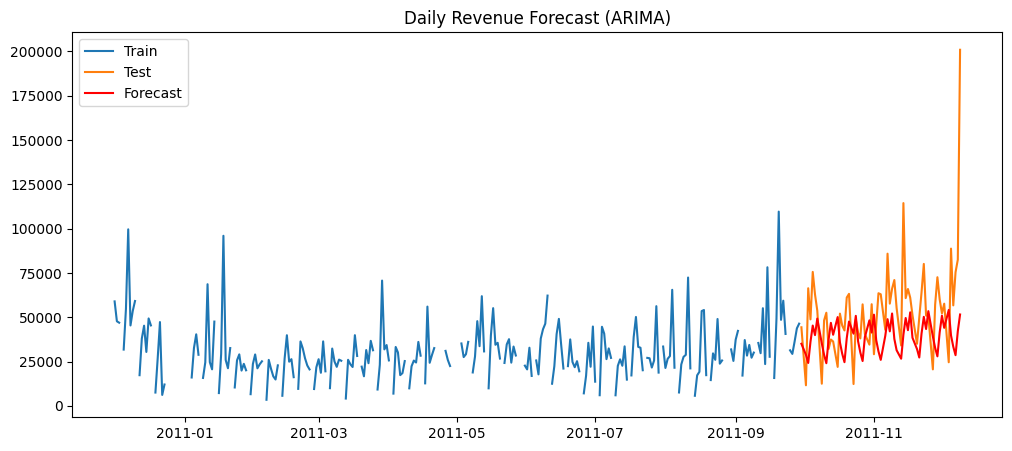

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("Daily Revenue Forecast (ARIMA)")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it ha

Rolling MAE : 11892.07936867042
Rolling RMSE: 15121.753538659792


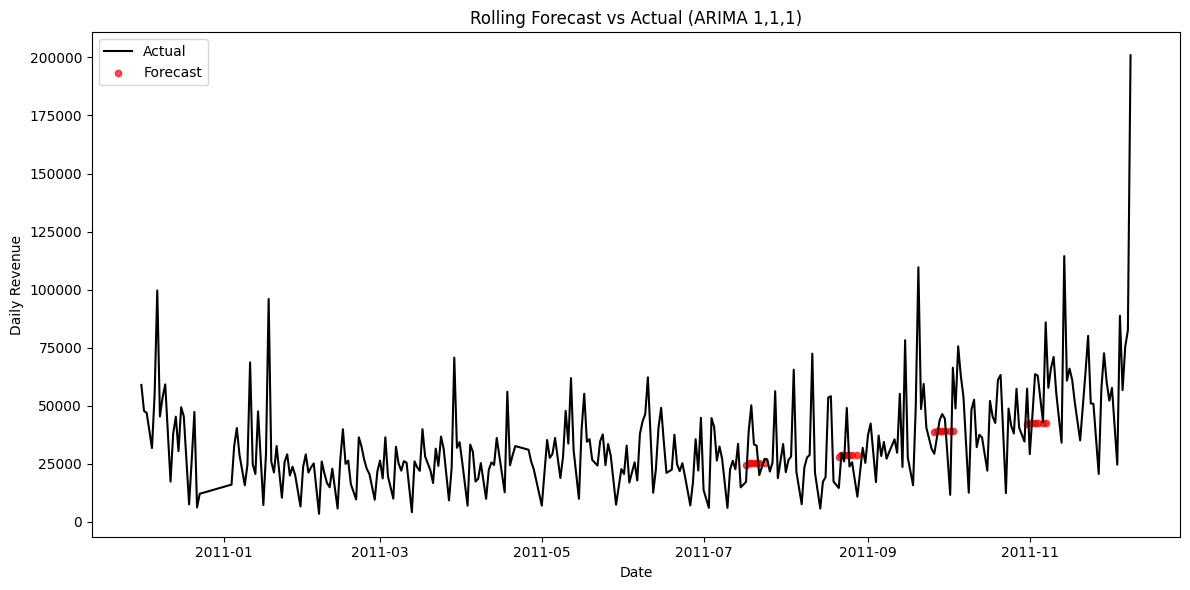

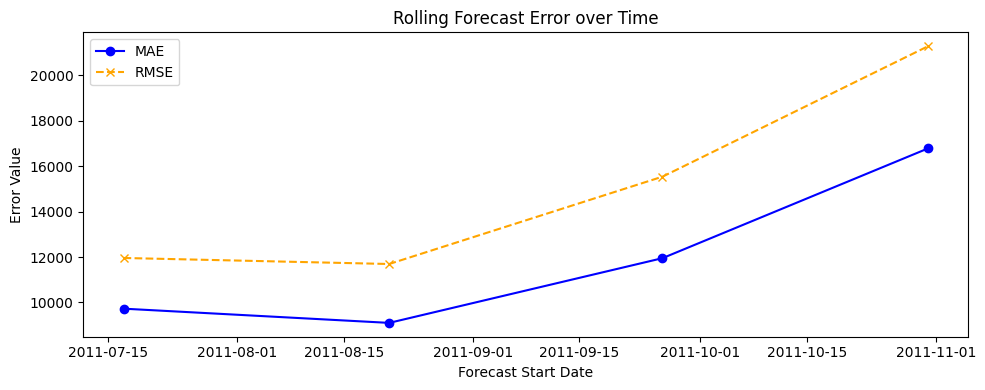

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

window = 180          # 6 th√°ng train
horizon = 7           # d·ª± b√°o 7 ng√†y
mae_list, rmse_list, forecast_dates = [], [], []
all_forecasts = []    # ƒë·ªÉ v·∫Ω Actual vs Forecast

for start in range(0, len(daily_revenue)-window-horizon, 30):  # b∆∞·ªõc 30 ng√†y
    train_end = start + window
    test_end  = train_end + horizon

    train = daily_revenue.iloc[start:train_end]
    test  = daily_revenue.iloc[train_end:test_end]

    model = ARIMA(train, order=(1,1,1))
    fit   = model.fit()
    forecast = fit.forecast(steps=horizon)

    # L∆∞u gi√° tr·ªã ƒë·ªÉ v·∫Ω
    all_forecasts.append((test.index, forecast))
    forecast_dates.append(test.index[0])

    mae  = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae_list.append(mae)
    rmse_list.append(rmse)

print("Rolling MAE :", np.mean(mae_list))
print("Rolling RMSE:", np.mean(rmse_list))

# ==== 1Ô∏è‚É£ Bi·ªÉu ƒë·ªì Actual vs Forecast c·ªßa t·ª´ng c·ª≠a s·ªï ====
plt.figure(figsize=(12,6))
plt.plot(daily_revenue.index, daily_revenue, label="Actual", color="black", linewidth=1.5)
for dates, forecast in all_forecasts:
    plt.scatter(dates, forecast, color="red", s=20, alpha=0.7, label="Forecast" if dates is all_forecasts[0][0] else "")
plt.title("Rolling Forecast vs Actual (ARIMA 1,1,1)")
plt.xlabel("Date")
plt.ylabel("Daily Revenue")
plt.legend()
plt.tight_layout()
plt.show()

# ==== 2Ô∏è‚É£ Bi·ªÉu ƒë·ªì l·ªói theo th·ªùi gian ====
plt.figure(figsize=(10,4))
plt.plot(forecast_dates, mae_list, marker='o', linestyle='-', label="MAE", color="blue")
plt.plot(forecast_dates, rmse_list, marker='x', linestyle='--', label="RMSE", color="orange")
plt.title("Rolling Forecast Error over Time")
plt.xlabel("Forecast Start Date")
plt.ylabel("Error Value")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
for i, (dates, forecast) in enumerate(all_forecasts):
    print(f"\n--- Window {i+1} ---")
    print("D·ª± b√°o cho c√°c ng√†y:", dates[0].date(), "->", dates[-1].date())
    actual_vals = daily_revenue.loc[dates]
    for d, a, f in zip(dates, actual_vals, forecast):
        print(f"{d.date()} | Actual: {a:,.0f} | Forecast: {f:,.0f}")



--- Window 1 ---
D·ª± b√°o cho c√°c ng√†y: 2011-07-17 -> 2011-07-24
2011-07-17 | Actual: 17,195 | Forecast: 24,676
2011-07-18 | Actual: 38,832 | Forecast: 25,342
2011-07-19 | Actual: 50,183 | Forecast: 25,387
2011-07-20 | Actual: 33,308 | Forecast: 25,390
2011-07-21 | Actual: 32,819 | Forecast: 25,390
2011-07-22 | Actual: 20,125 | Forecast: 25,390
2011-07-24 | Actual: 27,099 | Forecast: 25,390

--- Window 2 ---
D·ª± b√°o cho c√°c ng√†y: 2011-08-21 -> 2011-08-28
2011-08-21 | Actual: 14,577 | Forecast: 27,944
2011-08-22 | Actual: 29,651 | Forecast: 28,833
2011-08-23 | Actual: 25,994 | Forecast: 28,907
2011-08-24 | Actual: 49,035 | Forecast: 28,914
2011-08-25 | Actual: 23,827 | Forecast: 28,914
2011-08-26 | Actual: 25,626 | Forecast: 28,914
2011-08-28 | Actual: 10,805 | Forecast: 28,914

--- Window 3 ---
D·ª± b√°o cho c√°c ng√†y: 2011-09-26 -> 2011-10-03
2011-09-26 | Actual: 29,335 | Forecast: 38,700
2011-09-27 | Actual: 36,323 | Forecast: 39,250
2011-09-28 | Actual: 43,749 | Forecast: 3